# A craniometric study of deer of the subfamily Cervinae (Cervidae, Mammalia)

### Supplimentary materials

### *Roman Croitor*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
import missingno as msno
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas.plotting import parallel_coordinates
import matplotlib.cm as cm
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Import, adjustment, and selection of data

In [5]:
cranial_data = pd.read_excel('CERVIDAE CRANIAL MEASUREMENTS.xlsx')

In [6]:
cranial_data.head()

,genus,species,subspecies,nn,Locality,sex,Collection,note,deer_species,L_P2_occiput,...,LBRIN_P2COND,WOCC_P2COND,WM3_P2COND,WFR_P2COND,PP_MM,LBRIN_P2COND2,WBRAINC_WFR,LBRIN_M3COND,HOCC_WOCC,WCOND_WFR
0,Megaloceros,giganteus,giganteus,M2326,Ireland,F,NHML,continental,M. g. giganteus,339.8,...,32.136551,45.144202,39.640965,NaN,72.749100,32.136551,NaN,72.749100,73.663625,NaN
1,Megaloceros,giganteus,giganteus,nn0,Ireland,F,NHML,continental,M. g. giganteus,335.5,...,31.147541,45.335320,40.089419,NaN,69.109357,31.147541,NaN,69.109357,68.770546,NaN
2,Megaloceros,giganteus,giganteus,8-VI-80,Ireland,F,NHML,continental,M. g. giganteus,342.0,...,NaN,40.292398,NaN,NaN,73.743017,NaN,NaN,73.743017,NaN,NaN
3,Megaloceros,giganteus,giganteus,M28968,Ireland,M,NHML,continental,M. g. giganteus,367.6,...,36.996736,50.870511,38.275299,53.04679,66.666667,36.996736,60.410256,66.666667,69.251337,54.871795
4,Megaloceros,giganteus,giganteus,M42233,Ireland,M,NHML,continental,M. g. giganteus,383.0,...,37.206266,51.174935,36.422977,56.13577,73.963134,37.206266,56.604651,73.963134,64.795918,50.232558


In [7]:
cranial_data['species'] = cranial_data['species'].str.replace('dupuisi', 'giulii')
cranial_data['subspecies'] = cranial_data['subspecies'].str.replace('dupuisi', 'giulii')

In [8]:
genera = ['Megaloceros', 'Megaceroides',
          'Dama',
          'Axis',
          'Cervus',
          'Eucladoceros',
          'Metacervocerus',
          'Praemegaceros',
          'Praedama',
          'Candiacervus',
          'Haploidoceros',
          'Megaceroides',
          'Hyelaphus',
          'Panolia',
          'Muntiacus', 'Praeelaphus',
          'Rucervus', 'Elaphurus', 'Rusa']

In [9]:
cranial_data_m = cranial_data[cranial_data['genus'].isin(genera)]

In [10]:
cranial_data_m.reset_index(drop=True, inplace=True)

In [11]:
cranial_df = cranial_data_m[['genus', 'species', 'subspecies', 'deer_species', 'L_P2_occiput', 'CBL', 'L_P2_M3', 'L_M1_M3', 'L_P2_P4',
       'L_P2_prosth', 'L_M3_occ_cond', 'L_basiocc', 'W_occiput', 'W_occ_cond',
       'H_occiput', 'W_at_M3', 'W_at_P2', 'W_rostrum',
       'W_at_orbits', 'W_frontal', 'W_braincase', 'D_orbit', 'L_front_sut',
       'L_orbit_prosth', 'L_orbit_occiput', 'L_bregma_inion', 'L_bregma_prosth', 'L_nasal']]

In [12]:
cranial_df.head()

,genus,species,subspecies,deer_species,L_P2_occiput,CBL,L_P2_M3,L_M1_M3,L_P2_P4,L_P2_prosth,...,W_at_orbits,W_frontal,W_braincase,D_orbit,L_front_sut,L_orbit_prosth,L_orbit_occiput,L_bregma_inion,L_bregma_prosth,L_nasal
0,Megaloceros,giganteus,giganteus,M. g. giganteus,339.8,480.0,141.6,83.3,60.6,140.2,...,190.0,NaN,107.4,59.1,115.2,285.0,147.0,109.2,NaN,NaN
1,Megaloceros,giganteus,giganteus,M. g. giganteus,335.5,NaN,143.3,88.7,61.3,NaN,...,176.3,NaN,105.6,55.4,NaN,NaN,156.0,104.5,NaN,NaN
2,Megaloceros,giganteus,giganteus,M. g. giganteus,342.0,483.0,147.0,89.5,66.0,141.0,...,NaN,NaN,108.2,NaN,NaN,273.0,150.0,NaN,NaN,NaN
3,Megaloceros,giganteus,giganteus,M. g. giganteus,367.6,505.0,150.0,90.0,60.0,137.4,...,215.0,195.0,117.8,56.1,NaN,290.0,185.2,136.0,NaN,NaN
4,Megaloceros,giganteus,giganteus,M. g. giganteus,383.0,510.0,153.3,86.8,64.2,127.0,...,220.0,215.0,121.7,57.2,NaN,NaN,187.3,142.5,NaN,NaN


In [13]:
cranial_df = cranial_df.groupby('deer_species')['L_P2_occiput', 'CBL', 'L_P2_M3', 'L_M1_M3', 'L_P2_P4',
       'L_P2_prosth', 'L_M3_occ_cond', 'L_basiocc', 'W_occiput',
       'W_occ_cond', 'H_occiput', 'W_at_M3', 'W_at_P2',
       'W_rostrum', 'W_at_orbits', 'W_frontal', 'W_braincase',
       'D_orbit', 'L_front_sut', 'L_orbit_prosth',
       'L_orbit_occiput', 'L_bregma_inion', 'L_bregma_prosth', 'L_nasal'].mean().reset_index()

In [14]:
cranial_df.head(len(cranial_df))

,deer_species,L_P2_occiput,CBL,L_P2_M3,L_M1_M3,L_P2_P4,L_P2_prosth,L_M3_occ_cond,L_basiocc,W_occiput,...,W_at_orbits,W_frontal,W_braincase,D_orbit,L_front_sut,L_orbit_prosth,L_orbit_occiput,L_bregma_inion,L_bregma_prosth,L_nasal
0,"""Pseudodama""",202.0,NaN,87.500,53.00,40.00,NaN,117.300,NaN,NaN,...,NaN,NaN,NaN,NaN,81.400,NaN,81.200000,78.600,NaN,NaN
1,A. axis,180.7,262.0,79.250,48.75,31.75,81.3,101.525,76.8,83.533333,...,84.933333,94.3,71.775,39.85,78.825,143.7,80.233333,73.575,NaN,97.2
2,Alexandria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,142.4,111.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C. c. combrayicus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.800000,...,NaN,147.0,157.800,NaN,NaN,NaN,NaN,105.000,NaN,NaN
4,C. c. palmidactyloceros,NaN,430.0,NaN,NaN,NaN,NaN,NaN,NaN,130.700000,...,NaN,171.0,NaN,NaN,NaN,255.9,NaN,107.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,R. radulescui,310.0,NaN,123.375,72.85,55.50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,R. timorensis,172.5,254.0,74.000,44.70,33.00,81.5,104.000,NaN,99.200000,...,NaN,95.3,70.500,39.50,NaN,138.0,NaN,76.000,200.0,84.0
70,R. unicolor,261.5,405.0,111.100,63.00,48.10,143.5,NaN,NaN,NaN,...,NaN,128.1,87.500,54.30,140.500,NaN,NaN,86.600,363.0,129.0
71,Venta Micena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,111.300,NaN,NaN,NaN,NaN,106.300,NaN,NaN


In [15]:
print(cranial_df['deer_species'])

0                "Pseudodama"
1                     A. axis
2                  Alexandria
3           C. c. combrayicus
4     C. c. palmidactyloceros
               ...           
68              R. radulescui
69              R. timorensis
70                R. unicolor
71               Venta Micena
72                    unclear
Name: deer_species, Length: 73, dtype: object


### Correlation heatmap of cranial measurements before imputation of missing data

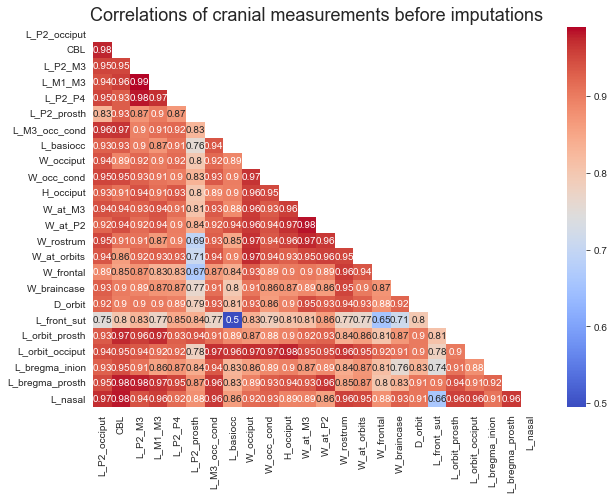

In [16]:
corr = cranial_df.corr()
sns.set_style(style='white')

matrix = np.triu(corr)

sns.heatmap(corr, annot=True, mask=matrix, cmap="coolwarm",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Correlations of cranial measurements before imputations',fontsize=18)
fig = plt.gcf()
fig.set_size_inches(10, 7)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#plt.savefig("before_imputation.jpg", bbox_inches='tight', dpi = 600)
plt.show()

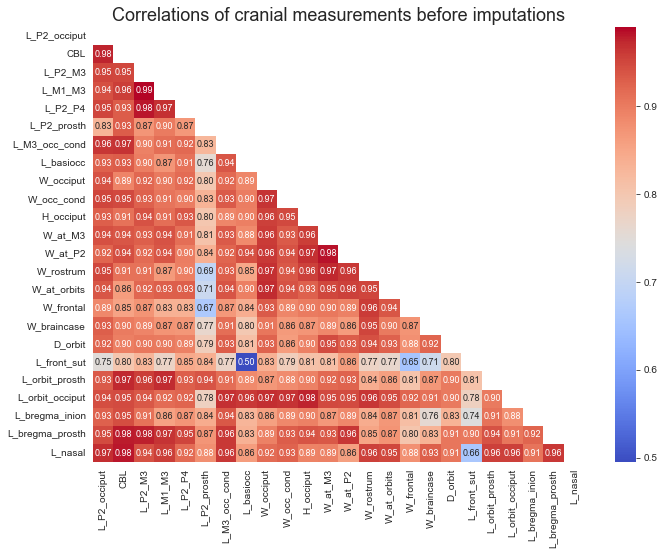

In [17]:
# improved version of heatmap
corr = cranial_df.corr()
sns.set_style(style='white')

matrix = np.triu(corr)

sns.heatmap(corr, annot=True, fmt=".2f", mask=matrix, cmap="coolwarm",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot_kws={"size": 9}).set_title('Correlations of cranial measurements before imputations', fontsize=18)

fig = plt.gcf()
fig.set_size_inches(11, 8)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.savefig("before_imputation.jpg", bbox_inches='tight', dpi=600)
plt.show()


### Imputation of missing data using linear and multilinear regressions

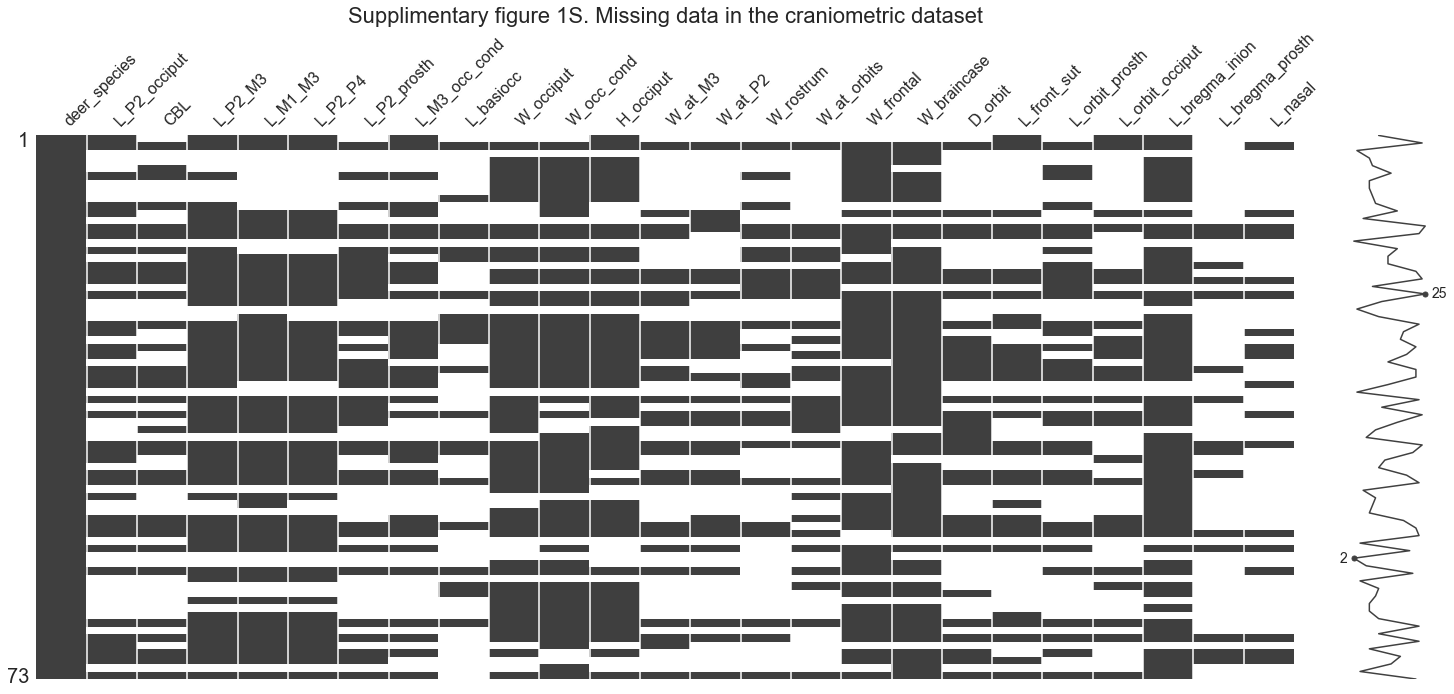

In [18]:
msno.matrix(cranial_df)
plt.title("Supplimentary figure 1S. Missing data in the craniometric dataset",fontsize=22)
plt.savefig("Fig_1S_missing_data.jpg", bbox_inches='tight', dpi=600)
plt.show()

In [19]:
# Calculation of missing values and their percentage for each species/subspecies involved in the study
selected_column = 'deer_species'

# Iteration through rows and printing missing data count along with selected column's value
for index, row in cranial_df.iterrows():
    missing_count = row.isna().sum()
    total_columns = len(row)
    missing_percentage = (missing_count / total_columns) * 100
    if missing_count > 0:
        print(f"Row {index} ({selected_column} = {row[selected_column]}): {missing_count} missing = {missing_percentage:.2f}%")

Row 0 (deer_species = "Pseudodama"): 15 missing = 60.00%
Row 1 (deer_species = A. axis): 1 missing = 4.00%
Row 2 (deer_species = Alexandria): 22 missing = 88.00%
Row 3 (deer_species = C. c. combrayicus): 18 missing = 72.00%
Row 4 (deer_species = C. c. palmidactyloceros): 17 missing = 68.00%
Row 5 (deer_species = C. c. sibiricus): 11 missing = 44.00%
Row 6 (deer_species = C. canadensis): 18 missing = 72.00%
Row 7 (deer_species = C. cf. nestii): 18 missing = 72.00%
Row 8 (deer_species = C. e. acoronatus): 17 missing = 68.00%
Row 9 (deer_species = C. e. bactrianus): 16 missing = 64.00%
Row 10 (deer_species = C. e. barbarus): 9 missing = 36.00%
Row 11 (deer_species = C. e. coronatus): 20 missing = 80.00%
Row 13 (deer_species = C. e. elaphus): 2 missing = 8.00%
Row 14 (deer_species = C. e. hispanicus): 23 missing = 92.00%
Row 15 (deer_species = C. e. maral): 9 missing = 36.00%
Row 16 (deer_species = C. e. siciliae): 12 missing = 48.00%
Row 17 (deer_species = C. nestii): 12 missing = 48.00%


In [20]:
# Here we exclude species that have more than 50% of missing measurements:
species_to_exclude = []

# Iteration through rows and adding 'deer_species' values to the list for rows with less than 50% missing data
for index, row in cranial_df.iterrows():
    missing_count = row.isna().sum()
    total_columns = len(row)
    missing_percentage = (missing_count / total_columns) * 100

    # Verification if missing_percentage is less than 50
    if missing_percentage > 50:
        poor_species = row[selected_column]
        species_to_exclude.append(poor_species)

print("List of 'deer_species' from rows with less than 50% missing data:")
print(species_to_exclude)

List of 'deer_species' from rows with less than 50% missing data:
['"Pseudodama"', 'Alexandria', 'C. c. combrayicus', 'C. c. palmidactyloceros', 'C. canadensis', 'C. cf. nestii', 'C. e. acoronatus', 'C. e. bactrianus', 'C. e. coronatus', 'C. e. hispanicus', 'D. clactoniana', 'D. eurygonos', 'E. c. ctenoides', 'E. c. olivolanus', 'Liventzovka', 'M. g. antecedens', 'M. g. latifrons', 'M. g. padanus', 'M. pardinensis', 'M. punjabiensis', 'M. rhenanus ssp.', 'M. shansius', 'Olivola', 'P. australorientalis', 'P. gigans', 'P. lyra', 'P. mosbachensis', 'P. perrieri', 'P. pliotarandoides', 'P. savini', 'P. solilhacus', 'P. verticornis', 'P. warthae', 'R. ardei', 'R. radulescui', 'Venta Micena']


In [28]:
# Here we create the list of cervid forms that we exclude from analysis:
values_to_exclude = ['Alexandria', 'M. g. italiae', 'Grigorievka',
     'Venta Micena', 'C. c. combrayicus', 
     'E. c. ctenoides', 'C. e. coronatus',
     'E. c. olivolanus', 'C. e. acoronatus',
     'M. rhenanus ssp.', 'C. cf. nestii',
     'M. shansius', 'C. canadensis',
     'Olivola',
     'P. australorientalis',
     'P. gigans',
     'P. lyra',
     'P. mosbachensis',
     'P. perrieri',
     'P. savini',
     'C. e. hispanicus', 'Komissarovo',
     'Liventzovka',
     'Rucervus ssp.',
     'P. solilhacus',
     'M. g. latifrons',
     'M. g. padanus',            
     'Venta Micena']

In [29]:
# We exclude rows where 'species_name' is in the list of values to exclude
cranial_selected = cranial_df[~cranial_df['deer_species'].isin(values_to_exclude)]

In [30]:
display(cranial_selected)

,deer_species,L_P2_occiput,CBL,L_P2_M3,L_M1_M3,L_P2_P4,L_P2_prosth,L_M3_occ_cond,L_basiocc,W_occiput,...,W_at_orbits,W_frontal,W_braincase,D_orbit,L_front_sut,L_orbit_prosth,L_orbit_occiput,L_bregma_inion,L_bregma_prosth,L_nasal
0,"""Pseudodama""",202.000000,NaN,87.500000,53.000000,40.000000,NaN,117.300000,NaN,NaN,...,NaN,NaN,NaN,NaN,81.400000,NaN,81.200000,78.600000,NaN,NaN
1,A. axis,180.700000,262.000000,79.250000,48.750000,31.750000,81.300000,101.525000,76.800000,83.533333,...,84.933333,94.300000,71.775000,39.850000,78.825000,143.700000,80.233333,73.575000,NaN,97.200000
4,C. c. palmidactyloceros,NaN,430.000000,NaN,NaN,NaN,NaN,NaN,NaN,130.700000,...,NaN,171.000000,NaN,NaN,NaN,255.900000,NaN,107.000000,NaN,NaN
5,C. c. sibiricus,271.400000,404.000000,123.000000,NaN,NaN,132.600000,156.200000,NaN,149.000000,...,NaN,133.400000,102.200000,NaN,NaN,242.400000,NaN,98.900000,NaN,NaN
9,C. e. bactrianus,241.888889,354.555556,116.000000,NaN,NaN,112.666667,135.111111,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,205.666667,NaN,NaN,NaN,NaN
10,C. e. barbarus,228.000000,NaN,101.000000,66.500000,51.000000,NaN,118.500000,NaN,NaN,...,NaN,106.300000,77.800000,46.700000,122.000000,NaN,98.000000,72.300000,NaN,104.200000
12,C. e. corsicanus,213.000000,320.000000,96.000000,57.200000,43.000000,107.000000,117.000000,78.000000,102.000000,...,108.700000,98.800000,88.000000,47.500000,104.400000,190.200000,97.000000,75.200000,280.000000,108.500000
13,C. e. elaphus,242.500000,361.600000,108.500000,66.533333,46.666667,119.990000,151.600000,70.000000,117.800000,...,136.750000,118.400000,94.050000,48.200000,146.000000,219.100000,NaN,90.325000,345.000000,129.000000
15,C. e. maral,278.888889,423.222222,118.100000,NaN,NaN,146.272727,167.444444,115.000000,136.700000,...,142.727273,137.520000,115.360000,NaN,NaN,263.272727,NaN,100.166667,NaN,NaN
16,C. e. siciliae,NaN,NaN,92.500000,55.700000,37.000000,97.000000,NaN,65.216667,87.500000,...,109.320000,NaN,86.550000,NaN,NaN,NaN,NaN,80.066667,NaN,NaN


###### Visualisation of missing values in selected deer forms:

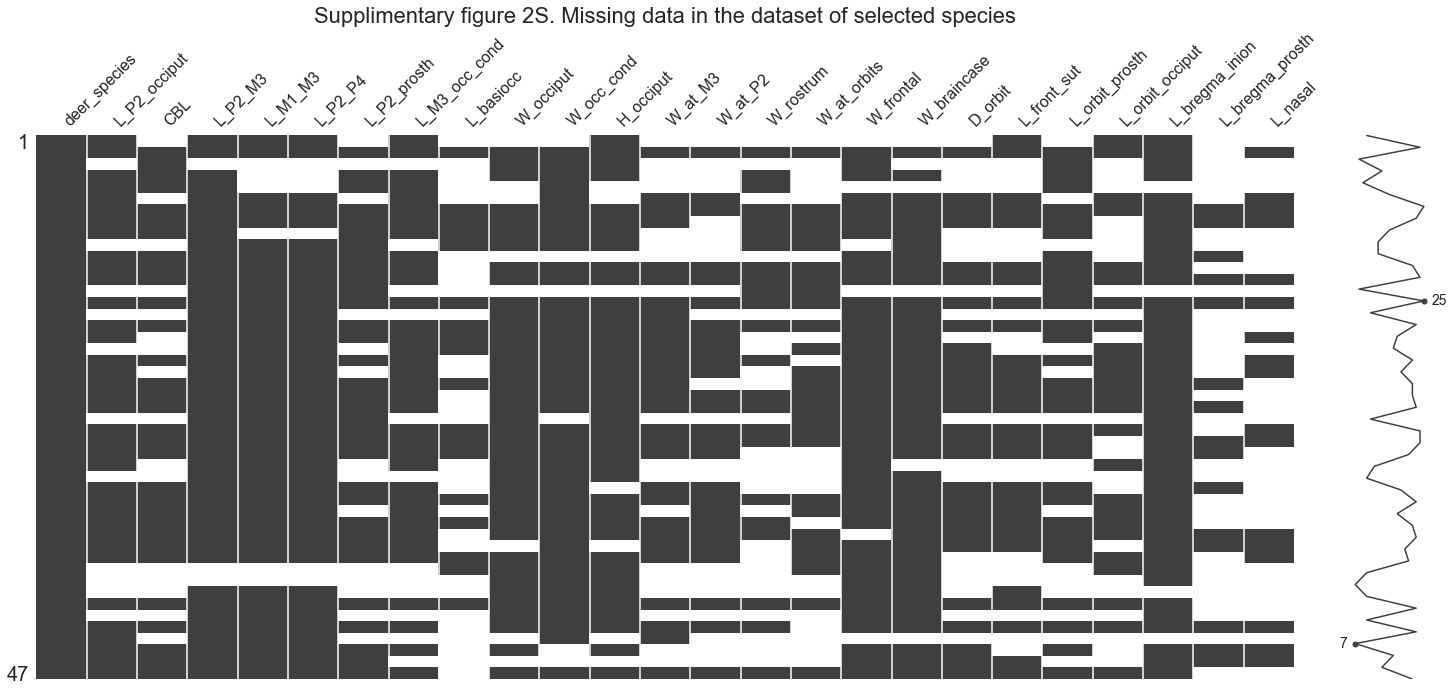

In [31]:
msno.matrix(cranial_selected)
plt.title("Supplimentary figure 2S. Missing data in the dataset of selected species",fontsize=22)
plt.savefig("Fig_2S_missing_data_selected.jpg", bbox_inches='tight', dpi=600)
plt.show()

### Imputation of P2 - occipital condyles distance using occiput width

In [32]:
# creation of a table with incomplete data
deer_missing_p2_occ_condyles = cranial_selected[cranial_selected['L_P2_occiput'].isnull()].reset_index(drop=True)
len(deer_missing_p2_occ_condyles)

11

In [33]:
# creation of a table with complete data
deer_with_p2_occ_condyles = cranial_selected[cranial_selected['L_P2_occiput'].notna()].reset_index(drop=True)
len(deer_with_p2_occ_condyles)

36

In [34]:
regression_p2_occ_condyles = smf.ols('L_P2_occiput ~ W_occiput', data = deer_with_p2_occ_condyles).fit()

In [35]:
print(regression_p2_occ_condyles.summary())

                            OLS Regression Results                            
Dep. Variable:           L_P2_occiput   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     200.2
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           5.23e-14
Time:                        01:27:53   Log-Likelihood:                -131.60
No. Observations:                  29   AIC:                             267.2
Df Residuals:                      27   BIC:                             269.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1428     16.237      0.009      0.9

In [36]:
predicting_p2_occ_condyles = regression_p2_occ_condyles.predict(deer_missing_p2_occ_condyles)

In [37]:
deer_missing_p2_occ_condyles['L_P2_occiput'] = predicting_p2_occ_condyles

In [38]:
cranial_selected = cranial_selected.append(deer_missing_p2_occ_condyles, ignore_index=True)

In [40]:
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of P2 - occipital condyles distance using braincase breadth

In [41]:
# creation of a table with incomplete data
hispanicus_missing_p2_occ_condyles = cranial_selected[cranial_selected['L_P2_occiput'].isnull()].reset_index(drop=True)
len(hispanicus_missing_p2_occ_condyles)

1

In [42]:
# creation of a table with complete data
cervidae_with_p2_occ_condyles = cranial_selected[cranial_selected['L_P2_occiput'].notna()].reset_index(drop=True)
len(cervidae_with_p2_occ_condyles)

46

In [43]:
second_regression_p2_occ_cond = smf.ols('L_P2_occiput ~ W_braincase', data = cervidae_with_p2_occ_condyles).fit()

In [44]:
print(second_regression_p2_occ_cond.summary())

                            OLS Regression Results                            
Dep. Variable:           L_P2_occiput   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     181.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           3.02e-16
Time:                        01:28:28   Log-Likelihood:                -195.93
No. Observations:                  41   AIC:                             395.9
Df Residuals:                      39   BIC:                             399.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -43.0828     21.183     -2.034      

In [45]:
predicting_p2_occ_cond = second_regression_p2_occ_cond.predict(hispanicus_missing_p2_occ_condyles)

In [46]:
hispanicus_missing_p2_occ_condyles['L_P2_occiput'] = predicting_p2_occ_cond

In [47]:
cranial_selected = cranial_selected.append(hispanicus_missing_p2_occ_condyles, ignore_index=True)

In [48]:
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of P2 - occipital condyles distance using face length and upper tooth row length

In [49]:
# creation of a table with incomplete data
iii_missing_p2_occ_condyles = cranial_selected[cranial_selected['L_P2_occiput'].isnull()].reset_index(drop=True)
len(iii_missing_p2_occ_condyles)

1

In [50]:
# creation of a table with complete data
iii_with_p2_occ_condyles = cranial_selected[cranial_selected['L_P2_occiput'].notna()].reset_index(drop=True)
len(iii_with_p2_occ_condyles)

46

In [51]:
iii_regression_p2_occ_cond = smf.ols('L_P2_occiput ~ L_orbit_prosth + L_P2_M3', data = iii_with_p2_occ_condyles).fit()

In [52]:
print(iii_regression_p2_occ_cond.summary())

                            OLS Regression Results                            
Dep. Variable:           L_P2_occiput   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           2.80e-16
Time:                        01:28:38   Log-Likelihood:                -123.05
No. Observations:                  29   AIC:                             252.1
Df Residuals:                      26   BIC:                             256.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.0370     14.641     -1.

In [53]:
iii_predicting_p2_occ_cond = iii_regression_p2_occ_cond.predict(iii_missing_p2_occ_condyles)

In [54]:
iii_missing_p2_occ_condyles['L_P2_occiput'] = iii_predicting_p2_occ_cond

In [55]:
cranial_selected = cranial_selected.append(iii_missing_p2_occ_condyles, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of L_P2_M3 using L_P2_occipital_condyles

In [56]:
# creation of a table with incomplete data
deer_missing_L_P2_M3 = cranial_selected[cranial_selected['L_P2_M3'].isnull()].reset_index(drop=True)
len(deer_missing_L_P2_M3)

3

In [57]:
# creation of a table with complete data
deer_with_L_P2_M3 = cranial_selected[cranial_selected['L_P2_M3'].notna()].reset_index(drop=True)
len(deer_with_L_P2_M3)

44

In [58]:
regression_L_P2_M3 = smf.ols('L_P2_M3 ~ L_P2_occiput', data = deer_with_L_P2_M3).fit()

In [59]:
print(regression_L_P2_M3.summary())

                            OLS Regression Results                            
Dep. Variable:                L_P2_M3   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     316.2
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           3.67e-21
Time:                        01:28:50   Log-Likelihood:                -153.62
No. Observations:                  44   AIC:                             311.2
Df Residuals:                      42   BIC:                             314.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       19.3173      4.658      4.147   

In [60]:
predicting_L_P2_M3 = regression_L_P2_M3.predict(deer_missing_L_P2_M3)

In [61]:
deer_missing_L_P2_M3['L_P2_M3'] = predicting_L_P2_M3

In [62]:
cranial_selected = cranial_selected.append(deer_missing_L_P2_M3, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of L_M1_M3 using L_P2_occipital_condyles

In [63]:
# creation of a table with incomplete data
deer_missing_L_M1_M3 = cranial_selected[cranial_selected['L_M1_M3'].isnull()].reset_index(drop=True)
len(deer_missing_L_M1_M3)

6

In [64]:
# creation of a table with complete data
deer_with_L_M1_M3 = cranial_selected[cranial_selected['L_M1_M3'].notna()].reset_index(drop=True)
len(deer_with_L_M1_M3)

41

In [65]:
# creation of regression
regression_L_M1_M3 = smf.ols('L_M1_M3 ~ L_P2_occiput', data = deer_with_L_M1_M3).fit()

In [66]:
print(regression_L_M1_M3.summary())

                            OLS Regression Results                            
Dep. Variable:                L_M1_M3   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     238.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           3.33e-18
Time:                        01:28:57   Log-Likelihood:                -126.56
No. Observations:                  41   AIC:                             257.1
Df Residuals:                      39   BIC:                             260.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.3143      3.127      3.938   

In [67]:
# using the regression for predicting missing values:
predicting_L_M1_M3 = regression_L_M1_M3.predict(deer_missing_L_M1_M3)

In [68]:
# completing the table with missing data with predicted values
deer_missing_L_M1_M3['L_M1_M3'] = predicting_L_M1_M3

In [69]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_M1_M3, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Inputation of premolar series length

In [70]:
# creation of a table with incomplete data
deer_missing_L_P2_P4 = cranial_selected[cranial_selected['L_P2_P4'].isnull()].reset_index(drop=True)
len(deer_missing_L_P2_P4)

6

In [71]:
# imputation of missing values
deer_missing_L_P2_P4['L_P2_P4'] = deer_missing_L_P2_P4['L_P2_M3'] - deer_missing_L_P2_P4['L_M1_M3']

In [72]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_P2_P4, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

In [73]:
cranial_selected.columns

Index(['deer_species', 'L_P2_occiput', 'CBL', 'L_P2_M3', 'L_M1_M3', 'L_P2_P4',
       'L_P2_prosth', 'L_M3_occ_cond', 'L_basiocc', 'W_occiput', 'W_occ_cond',
       'H_occiput', 'W_at_M3', 'W_at_P2', 'W_rostrum', 'W_at_orbits',
       'W_frontal', 'W_braincase', 'D_orbit', 'L_front_sut', 'L_orbit_prosth',
       'L_orbit_occiput', 'L_bregma_inion', 'L_bregma_prosth', 'L_nasal'],
      dtype='object')

### Imputation of braincase breadth using P2 - occipital condyles length

In [74]:
# creation of a table with incomplete data
deer_missing_W_braincase = cranial_selected[cranial_selected['W_braincase'].isnull()].reset_index(drop=True)
len(deer_missing_W_braincase)

6

In [75]:
# creation of a table with complete data
deer_with_W_braincase = cranial_selected[cranial_selected['W_braincase'].notna()].reset_index(drop=True)
len(deer_with_W_braincase)

41

In [76]:
# creation of regression
regression_W_braincase = smf.ols('W_braincase ~ L_P2_occiput', data = deer_with_W_braincase).fit()

In [77]:
print(regression_W_braincase.summary())

                            OLS Regression Results                            
Dep. Variable:            W_braincase   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     181.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           3.02e-16
Time:                        01:29:10   Log-Likelihood:                -145.16
No. Observations:                  41   AIC:                             294.3
Df Residuals:                      39   BIC:                             297.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       27.0811      4.787      5.657   

In [78]:
# using the regression for predicting missing values:
predicting_W_braincase = regression_W_braincase.predict(deer_missing_W_braincase)

In [79]:
# completing the table with missing data with predicted values
deer_missing_W_braincase['W_braincase'] = predicting_W_braincase

In [80]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_W_braincase, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of frontal breadth using braincase breadth

In [81]:
# creation of a table with incomplete data
deer_missing_W_frontal = cranial_selected[cranial_selected['W_frontal'].isnull()].reset_index(drop=True)
len(deer_missing_W_frontal)

6

In [82]:
# creation of a table with complete data
deer_with_W_frontal = cranial_selected[cranial_selected['W_frontal'].notna()].reset_index(drop=True)
len(deer_with_W_frontal)

41

In [83]:
# creation of regression
regression_W_frontal = smf.ols('W_frontal ~ W_braincase', data = deer_with_W_frontal).fit()

In [84]:
print(regression_W_frontal.summary())

                            OLS Regression Results                            
Dep. Variable:              W_frontal   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     165.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.32e-15
Time:                        01:29:16   Log-Likelihood:                -170.15
No. Observations:                  41   AIC:                             344.3
Df Residuals:                      39   BIC:                             347.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -23.5348     11.439     -2.057      

In [85]:
# using the regression for predicting missing values:
predicting_W_frontal = regression_W_frontal.predict(deer_missing_W_frontal)

In [86]:
# completing the table with missing data with predicted values
deer_missing_W_frontal['W_frontal'] = predicting_W_frontal

In [87]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_W_frontal, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of breadth at orbits using length of upper molar series length and frontal breadth

In [88]:
# creation of a table with incomplete data
deer_missing_W_at_orbits = cranial_selected[cranial_selected['W_at_orbits'].isnull()].reset_index(drop=True)
len(deer_missing_W_at_orbits)

21

In [89]:
# creation of a table with complete data
deer_with_W_at_orbits = cranial_selected[cranial_selected['W_at_orbits'].notna()].reset_index(drop=True)
len(deer_with_W_at_orbits)

26

In [90]:
# creation of regression
regression_W_at_orbits = smf.ols('W_at_orbits ~ W_frontal + L_M1_M3', data = deer_with_W_at_orbits).fit()

In [91]:
print(regression_W_at_orbits.summary())

                            OLS Regression Results                            
Dep. Variable:            W_at_orbits   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     146.6
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           8.15e-14
Time:                        01:29:23   Log-Likelihood:                -101.94
No. Observations:                  26   AIC:                             209.9
Df Residuals:                      23   BIC:                             213.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.5660     11.127     -3.017      0.0

In [92]:
# using the regression for predicting missing values:
predicting_W_at_orbits = regression_W_at_orbits.predict(deer_missing_W_at_orbits)

In [93]:
# completing the table with missing data with predicted values
deer_missing_W_at_orbits['W_at_orbits'] = predicting_W_at_orbits

In [94]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_W_at_orbits, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of breadth of rostrum using the distance P2 - occipital condyles

In [95]:
# creation of a table with incomplete data
deer_missing_W_rostrum = cranial_selected[cranial_selected['W_rostrum'].isnull()].reset_index(drop=True)
len(deer_missing_W_rostrum)

24

In [96]:
# creation of a table with complete data
deer_with_W_rostrum = cranial_selected[cranial_selected['W_rostrum'].notna()].reset_index(drop=True)
len(deer_with_W_at_orbits)

26

In [97]:
# creation of regression
regression_W_rostrum = smf.ols('W_rostrum ~ L_P2_occiput', data = deer_with_W_rostrum).fit()

In [98]:
print(regression_W_rostrum.summary())

                            OLS Regression Results                            
Dep. Variable:              W_rostrum   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.35e-09
Time:                        01:29:30   Log-Likelihood:                -77.876
No. Observations:                  23   AIC:                             159.8
Df Residuals:                      21   BIC:                             162.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.4995      6.294     -1.191   

In [99]:
# using the regression for predicting missing values:
predicting_W_rostrum = regression_W_rostrum.predict(deer_missing_W_rostrum)

In [100]:
# completing the table with missing data with predicted values
deer_missing_W_rostrum['W_rostrum'] = predicting_W_rostrum

In [101]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_W_rostrum, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of the distance between M3 and occipital condyles

In [102]:
# creation of a table with incomplete data
deer_missing_L_M3_occ_cond = cranial_selected[cranial_selected['L_M3_occ_cond'].isnull()].reset_index(drop=True)
len(deer_missing_L_M3_occ_cond)

12

In [103]:
# creation of a table with complete data
deer_with_L_M3_occ_cond = cranial_selected[cranial_selected['L_M3_occ_cond'].notna()].reset_index(drop=True)
len(deer_with_L_M3_occ_cond)

35

In [104]:
# creation of regression
regression_L_M3_occ_cond = smf.ols('L_M3_occ_cond ~ L_P2_occiput', data = deer_with_L_M3_occ_cond).fit()

In [105]:
print(regression_L_M3_occ_cond.summary())

                            OLS Regression Results                            
Dep. Variable:          L_M3_occ_cond   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     597.4
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.03e-22
Time:                        01:29:39   Log-Likelihood:                -127.11
No. Observations:                  35   AIC:                             258.2
Df Residuals:                      33   BIC:                             261.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.0606      5.907     -0.857   

In [106]:
# using the regression for predicting missing values:
predicting_L_M3_occ_cond = regression_L_M3_occ_cond.predict(deer_missing_L_M3_occ_cond)

In [107]:
# completing the table with missing data with predicted values
deer_missing_L_M3_occ_cond['L_M3_occ_cond'] = predicting_L_M3_occ_cond

In [108]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_M3_occ_cond, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of occipical condyles breadth using M3 - occipital condyles length

In [109]:
# creation of a table with incomplete data
deer_missing_W_occ_cond = cranial_selected[cranial_selected['W_occ_cond'].isnull()].reset_index(drop=True)
len(deer_missing_W_occ_cond)

6

In [110]:
# creation of a table with complete data
deer_with_W_occ_cond = cranial_selected[cranial_selected['W_occ_cond'].notna()].reset_index(drop=True)
len(deer_with_W_occ_cond)

41

In [111]:
# creation of regression
regression_W_occ_cond = smf.ols('W_occ_cond ~ L_M3_occ_cond', data = deer_with_L_M3_occ_cond).fit()

In [112]:
print(regression_W_occ_cond.summary())

                            OLS Regression Results                            
Dep. Variable:             W_occ_cond   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     292.1
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           5.21e-17
Time:                        01:29:45   Log-Likelihood:                -99.792
No. Observations:                  32   AIC:                             203.6
Df Residuals:                      30   BIC:                             206.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.6854      3.496      1.912

In [113]:
# using the regression for predicting missing values:
predicting_W_occ_cond = regression_W_occ_cond.predict(deer_missing_W_occ_cond)

In [114]:
# completing the table with missing data with predicted values
deer_missing_W_occ_cond['W_occ_cond'] = predicting_W_occ_cond

In [115]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_W_occ_cond, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of occiput height using breadth of occipital condyles

In [116]:
# creation of a table with incomplete data
deer_missing_H_occiput = cranial_selected[cranial_selected['H_occiput'].isnull()].reset_index(drop=True)
len(deer_missing_H_occiput)

8

In [117]:
# creation of a table with complete data
deer_with_H_occiput = cranial_selected[cranial_selected['H_occiput'].notna()].reset_index(drop=True)
len(deer_with_H_occiput)

39

In [118]:
# creation of regression
regression_H_occiput = smf.ols('H_occiput ~ W_occ_cond', data = deer_with_H_occiput).fit()

In [119]:
print(regression_H_occiput.summary())

                            OLS Regression Results                            
Dep. Variable:              H_occiput   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     392.9
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           2.68e-21
Time:                        01:29:53   Log-Likelihood:                -127.02
No. Observations:                  39   AIC:                             258.0
Df Residuals:                      37   BIC:                             261.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9442      4.000      0.486      0.6

In [120]:
# using the regression for predicting missing values:
predicting_H_occiput = regression_H_occiput.predict(deer_missing_H_occiput)

In [121]:
# completing the table with missing data with predicted values
deer_missing_H_occiput['H_occiput'] = predicting_H_occiput

In [122]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_H_occiput, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of occiput breadth using occipital condyles breadth and occiput height

In [123]:
# creation of a table with incomplete data
deer_missing_W_occiput = cranial_selected[cranial_selected['W_occiput'].isnull()].reset_index(drop=True)
len(deer_missing_W_occiput)

8

In [124]:
# creation of a table with complete data
deer_with_W_occiput = cranial_selected[cranial_selected['W_occiput'].notna()].reset_index(drop=True)
len(deer_with_W_occiput)

39

In [125]:
# creation of regression
regression_W_occiput = smf.ols('W_occiput ~ H_occiput', data = deer_with_W_occiput).fit()

In [126]:
print(regression_W_occiput.summary())

                            OLS Regression Results                            
Dep. Variable:              W_occiput   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     340.7
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           2.95e-20
Time:                        01:29:59   Log-Likelihood:                -145.96
No. Observations:                  39   AIC:                             295.9
Df Residuals:                      37   BIC:                             299.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3010      6.081      1.365      0.1

In [127]:
# using the regression for predicting missing values:
predicting_W_occiput = regression_W_occiput.predict(deer_missing_W_occiput)

In [128]:
# completing the table with missing data with predicted values
deer_missing_W_occiput['W_occiput'] = predicting_W_occiput

In [129]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_W_occiput, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of the length of basioccipitale using occipital measurements

In [130]:
# creation of a table with incomplete data
deer_missing_L_basiocc = cranial_selected[cranial_selected['L_basiocc'].isnull()].reset_index(drop=True)
len(deer_missing_L_basiocc)

29

In [131]:
# creation of a table with complete data
deer_with_L_basiocc = cranial_selected[cranial_selected['L_basiocc'].notna()].reset_index(drop=True)
len(deer_with_L_basiocc)

18

In [132]:
# creation of regression
regression_L_basiocc = smf.ols('L_basiocc ~ L_P2_occiput', data = deer_with_L_basiocc).fit()

In [133]:
print(regression_L_basiocc.summary())

                            OLS Regression Results                            
Dep. Variable:              L_basiocc   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     110.4
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.37e-08
Time:                        01:30:06   Log-Likelihood:                -67.938
No. Observations:                  18   AIC:                             139.9
Df Residuals:                      16   BIC:                             141.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3880      9.365      0.255   

In [134]:
# using the regression for predicting missing values:
predicting_L_basiocc = regression_L_basiocc.predict(deer_missing_L_basiocc)

In [135]:
# completing the table with missing data with predicted values
deer_missing_L_basiocc['L_basiocc'] = predicting_L_basiocc

In [136]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_basiocc, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of breadth at M3

In [137]:
# creation of a table with incomplete data
deer_missing_W_at_M3 = cranial_selected[cranial_selected['W_at_M3'].isnull()].reset_index(drop=True)
len(deer_missing_W_at_M3)

18

In [138]:
# creation of a table with complete data
deer_with_W_at_M3 = cranial_selected[cranial_selected['W_at_M3'].notna()].reset_index(drop=True)
len(deer_with_W_at_M3)

29

In [139]:
# creation of regression
regression_W_at_M3 = smf.ols('W_at_M3 ~ W_at_orbits', data = deer_with_W_at_M3).fit()

In [140]:
print(regression_W_at_M3.summary())

                            OLS Regression Results                            
Dep. Variable:                W_at_M3   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           4.45e-16
Time:                        01:30:12   Log-Likelihood:                -98.285
No. Observations:                  29   AIC:                             200.6
Df Residuals:                      27   BIC:                             203.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.4426      4.331      5.182      

In [141]:
# using the regression for predicting missing values:
predicting_W_at_M3 = regression_W_at_M3.predict(deer_missing_W_at_M3)

In [142]:
# completing the table with missing data with predicted values
deer_missing_W_at_M3['W_at_M3'] = predicting_W_at_M3

In [143]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_W_at_M3, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of breadth at P2

In [144]:
# creation of a table with incomplete data
deer_missing_W_at_P2 = cranial_selected[cranial_selected['W_at_P2'].isnull()].reset_index(drop=True)
len(deer_missing_W_at_P2)

21

In [145]:
# creation of a table with complete data
deer_with_W_at_P2 = cranial_selected[cranial_selected['W_at_P2'].notna()].reset_index(drop=True)
len(deer_with_W_at_P2)

26

In [146]:
# creation of regression
regression_W_at_P2 = smf.ols('W_at_P2 ~ W_at_M3', data = deer_with_W_at_P2).fit()

In [147]:
print(regression_W_at_P2.summary())

                            OLS Regression Results                            
Dep. Variable:                W_at_P2   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     666.4
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           5.10e-19
Time:                        01:30:18   Log-Likelihood:                -66.452
No. Observations:                  26   AIC:                             136.9
Df Residuals:                      24   BIC:                             139.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8857      2.421      1.605      0.1

In [148]:
# using the regression for predicting missing values:
predicting_W_at_P2 = regression_W_at_P2.predict(deer_missing_W_at_P2)

In [149]:
# completing the table with missing data with predicted values
deer_missing_W_at_P2['W_at_P2'] = predicting_W_at_P2

In [150]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_W_at_P2, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of diameter of orbit

In [151]:
# creation of a table with incomplete data
deer_missing_D_orbit = cranial_selected[cranial_selected['D_orbit'].isnull()].reset_index(drop=True)
len(deer_missing_D_orbit)

19

In [152]:
# creation of a table with complete data
deer_with_D_orbit = cranial_selected[cranial_selected['D_orbit'].notna()].reset_index(drop=True)
len(deer_with_D_orbit)

28

In [153]:
# creation of regression
regression_D_orbit = smf.ols('D_orbit ~ L_P2_occiput', data = deer_with_D_orbit).fit()

In [154]:
print(regression_D_orbit.summary())

                            OLS Regression Results                            
Dep. Variable:                D_orbit   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     158.4
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.45e-12
Time:                        01:30:24   Log-Likelihood:                -71.002
No. Observations:                  28   AIC:                             146.0
Df Residuals:                      26   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       18.4775      2.168      8.521   

In [155]:
# using the regression for predicting missing values:
predicting_D_orbit = regression_D_orbit.predict(deer_missing_D_orbit)

In [156]:
# completing the table with missing data with predicted values
deer_missing_D_orbit['D_orbit'] = predicting_D_orbit

In [157]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_D_orbit, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of bregma - inion distance using occipital height

In [158]:
# creation of a table with incomplete data
deer_missing_L_bregma_inion = cranial_selected[cranial_selected['L_bregma_inion'].isnull()].reset_index(drop=True)
len(deer_missing_L_bregma_inion)

4

In [159]:
# creation of a table with complete data
deer_with_L_bregma_inion = cranial_selected[cranial_selected['L_bregma_inion'].notna()].reset_index(drop=True)
len(deer_with_L_bregma_inion)

43

In [160]:
# creation of regression
regression_L_bregma_inion = smf.ols('L_bregma_inion ~ H_occiput', data = deer_with_D_orbit).fit()

In [161]:
print(regression_L_bregma_inion.summary())

                            OLS Regression Results                            
Dep. Variable:         L_bregma_inion   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     163.5
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.01e-12
Time:                        01:30:29   Log-Likelihood:                -93.437
No. Observations:                  28   AIC:                             190.9
Df Residuals:                      26   BIC:                             193.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0316      4.813      4.993      0.0

In [162]:
# using the regression for predicting missing values:
predicting_L_bregma_inion = regression_L_bregma_inion.predict(deer_missing_L_bregma_inion)

In [163]:
# completing the table with missing data with predicted values
deer_missing_L_bregma_inion['L_bregma_inion'] = predicting_L_bregma_inion

In [164]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_bregma_inion, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of Condylobasal length using P2 - occipital condyles length

In [165]:
# creation of a table with incomplete data
deer_missing_CBL = cranial_selected[cranial_selected['CBL'].isnull()].reset_index(drop=True)
len(deer_missing_CBL)

16

In [166]:
# creation of a table with complete data
deer_with_CBL = cranial_selected[cranial_selected['CBL'].notna()].reset_index(drop=True)
len(deer_with_CBL)

31

In [167]:
# creation of regression
regression_CBL = smf.ols('CBL ~ L_P2_occiput + W_occiput', data = deer_with_CBL).fit()

In [168]:
print(regression_CBL.summary())

                            OLS Regression Results                            
Dep. Variable:                    CBL   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     234.0
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           3.35e-18
Time:                        01:30:34   Log-Likelihood:                -139.43
No. Observations:                  31   AIC:                             284.9
Df Residuals:                      28   BIC:                             289.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.2754     15.467      1.117   

In [169]:
# using the regression for predicting missing values:
predicting_CBL = regression_CBL.predict(deer_missing_CBL)

In [170]:
# completing the table with missing data with predicted values
deer_missing_CBL['CBL'] = predicting_CBL

In [171]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_CBL, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of orbit - prosthion using condylobasal length

In [172]:
# creation of a table with incomplete data
deer_missing_L_orbit_prosth = cranial_selected[cranial_selected['L_orbit_prosth'].isnull()].reset_index(drop=True)
len(deer_missing_L_orbit_prosth)

16

In [173]:
# creation of a table with complete data
deer_with_L_orbit_prosth = cranial_selected[cranial_selected['L_orbit_prosth'].notna()].reset_index(drop=True)
len(deer_with_L_orbit_prosth)

31

In [174]:
# creation of regression
regression_L_orbit_prosth = smf.ols('L_orbit_prosth ~ CBL', data = deer_with_L_orbit_prosth).fit()

In [175]:
print(regression_L_orbit_prosth.summary())

                            OLS Regression Results                            
Dep. Variable:         L_orbit_prosth   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     471.2
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.76e-19
Time:                        01:30:39   Log-Likelihood:                -127.12
No. Observations:                  31   AIC:                             258.2
Df Residuals:                      29   BIC:                             261.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.8663      9.986     -2.190      0.0

In [176]:
# using the regression for predicting missing values:
predicting_L_orbit_prosth = regression_L_orbit_prosth.predict(deer_missing_L_orbit_prosth)

In [177]:
# completing the table with missing data with predicted values
deer_missing_L_orbit_prosth['L_orbit_prosth'] = predicting_L_orbit_prosth

In [178]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_orbit_prosth, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of P2 - prosthion distance using CBL

In [179]:
# creation of a table with incomplete data
deer_missing_L_P2_prosth = cranial_selected[cranial_selected['L_P2_prosth'].isnull()].reset_index(drop=True)
len(deer_missing_L_P2_prosth)

14

In [180]:
# creation of a table with complete data
deer_with_L_P2_prosth = cranial_selected[cranial_selected['L_P2_prosth'].notna()].reset_index(drop=True)
len(deer_with_L_P2_prosth)

33

In [181]:
# creation of regression
regression_L_P2_prosth = smf.ols('L_P2_prosth ~ CBL + L_orbit_prosth', data = deer_with_L_P2_prosth).fit()

In [182]:
print(regression_L_P2_prosth.summary())

                            OLS Regression Results                            
Dep. Variable:            L_P2_prosth   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           4.83e-14
Time:                        01:30:45   Log-Likelihood:                -125.39
No. Observations:                  33   AIC:                             256.8
Df Residuals:                      30   BIC:                             261.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.3119      7.720      2.

In [183]:
# using the regression for predicting missing values:
predicting_L_P2_prosth = regression_L_P2_prosth.predict(deer_missing_L_P2_prosth)

In [184]:
# completing the table with missing data with predicted values
deer_missing_L_P2_prosth['L_P2_prosth'] = predicting_L_P2_prosth

In [185]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_P2_prosth, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of Bregma - prosthion length

In [186]:
# creation of a table with incomplete data
deer_missing_L_bregma_prosth = cranial_selected[cranial_selected['L_bregma_prosth'].isnull()].reset_index(drop=True)
len(deer_missing_L_bregma_prosth)

32

In [187]:
# creation of a table with complete data
deer_with_L_bregma_prosth = cranial_selected[cranial_selected['L_bregma_prosth'].notna()].reset_index(drop=True)
len(deer_with_L_bregma_prosth)

15

In [188]:
# creation of linear regression
regression_L_bregma_prosth = smf.ols('L_bregma_prosth ~ CBL + L_P2_occiput', data = deer_with_L_bregma_prosth).fit()

In [189]:
print(regression_L_bregma_prosth.summary())

                            OLS Regression Results                            
Dep. Variable:        L_bregma_prosth   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     138.9
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           5.04e-09
Time:                        01:30:53   Log-Likelihood:                -63.530
No. Observations:                  15   AIC:                             133.1
Df Residuals:                      12   BIC:                             135.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.0882     16.706     -0.305   

In [190]:
# using the regression for predicting missing values:
predicting_L_bregma_prosth = regression_L_bregma_prosth.predict(deer_missing_L_bregma_prosth)

In [191]:
# completing the table with missing data with predicted values
deer_missing_L_bregma_prosth['L_bregma_prosth'] = predicting_L_bregma_prosth

In [192]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_bregma_prosth, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of orbit - occiput distance

In [193]:
# creation of a table with incomplete data
deer_missing_L_orbit_occiput = cranial_selected[cranial_selected['L_orbit_occiput'].isnull()].reset_index(drop=True)
len(deer_missing_L_orbit_occiput)

22

In [194]:
# creation of a table with complete data
deer_with_L_orbit_occiput = cranial_selected[cranial_selected['L_orbit_occiput'].notna()].reset_index(drop=True)
len(deer_with_L_orbit_occiput)

25

In [195]:
# creation of linear regression
regression_L_orbit_occiput = smf.ols('L_orbit_occiput ~ L_P2_occiput', data = deer_with_L_orbit_occiput).fit()

In [196]:
print(regression_L_orbit_occiput.summary())

                            OLS Regression Results                            
Dep. Variable:        L_orbit_occiput   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           2.98e-13
Time:                        01:31:00   Log-Likelihood:                -87.442
No. Observations:                  25   AIC:                             178.9
Df Residuals:                      23   BIC:                             181.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.9713      6.606      1.055   

In [197]:
# using the regression for predicting missing values:
predicting_L_orbit_occiput = regression_L_orbit_occiput.predict(deer_missing_L_orbit_occiput)

In [198]:
# completing the table with missing data with predicted values
deer_missing_L_orbit_occiput['L_orbit_occiput'] = predicting_L_orbit_occiput

In [199]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_orbit_occiput, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of nasal bone length

In [200]:
# creation of a table with incomplete data
deer_missing_L_nasal = cranial_selected[cranial_selected['L_nasal'].isnull()].reset_index(drop=True)
len(deer_missing_L_nasal)

30

In [201]:
# creation of a table with complete data
deer_with_L_nasal = cranial_selected[cranial_selected['L_nasal'].notna()].reset_index(drop=True)
len(deer_with_L_nasal)

17

In [202]:
# creation of linear regression
regression_L_nasal = smf.ols('L_nasal ~ L_P2_occiput + L_bregma_prosth', data = deer_with_L_nasal).fit()

In [203]:
print(regression_L_nasal.summary())

                            OLS Regression Results                            
Dep. Variable:                L_nasal   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     144.8
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           4.44e-10
Time:                        01:31:07   Log-Likelihood:                -58.661
No. Observations:                  17   AIC:                             123.3
Df Residuals:                      14   BIC:                             125.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.7831      8.306     

In [204]:
# using the regression for predicting missing values:
predicting_L_nasal = regression_L_nasal.predict(deer_missing_L_nasal)

In [205]:
# completing the table with missing data with predicted values
deer_missing_L_nasal['L_nasal'] = predicting_L_nasal

In [206]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_nasal, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Imputation of frontal suture length

In [207]:
# creation of a table with incomplete data
deer_missing_L_front_sut = cranial_selected[cranial_selected['L_front_sut'].isnull()].reset_index(drop=True)
len(deer_missing_L_front_sut)

19

In [208]:
# creation of a table with complete data
deer_with_L_front_sut = cranial_selected[cranial_selected['L_front_sut'].notna()].reset_index(drop=True)
len(deer_with_L_front_sut)

28

In [209]:
cranial_selected.columns

Index(['deer_species', 'L_P2_occiput', 'CBL', 'L_P2_M3', 'L_M1_M3', 'L_P2_P4',
       'L_P2_prosth', 'L_M3_occ_cond', 'L_basiocc', 'W_occiput', 'W_occ_cond',
       'H_occiput', 'W_at_M3', 'W_at_P2', 'W_rostrum', 'W_at_orbits',
       'W_frontal', 'W_braincase', 'D_orbit', 'L_front_sut', 'L_orbit_prosth',
       'L_orbit_occiput', 'L_bregma_inion', 'L_bregma_prosth', 'L_nasal'],
      dtype='object')

In [210]:
# creation of linear regression
regression_L_front_sut = smf.ols('L_front_sut ~ L_P2_prosth', data = deer_with_L_front_sut).fit()

In [211]:
print(regression_L_front_sut.summary())

                            OLS Regression Results                            
Dep. Variable:            L_front_sut   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     40.72
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           9.28e-07
Time:                        01:31:13   Log-Likelihood:                -113.58
No. Observations:                  28   AIC:                             231.2
Df Residuals:                      26   BIC:                             233.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      40.2551      9.634      4.179      

In [212]:
# using the regression for predicting missing values:
predicting_L_front_sut = regression_L_front_sut.predict(deer_missing_L_front_sut)

In [213]:
# completing the table with missing data with predicted values
deer_missing_L_front_sut['L_front_sut'] = predicting_L_front_sut

In [214]:
# appending the completed dataframe to the main dataframe and combination of dublons:
cranial_selected = cranial_selected.append(deer_missing_L_front_sut, ignore_index=True)
cranial_selected = cranial_selected.groupby(['deer_species'], as_index=False).agg('first')

### Correlation heatmap of data after imputation

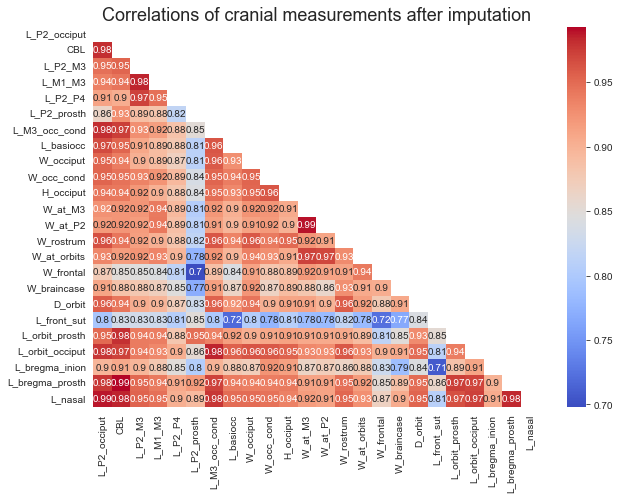

In [216]:
corr = cranial_selected.corr()
sns.set_style(style='white')
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap="coolwarm",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Correlations of cranial measurements after imputation',fontsize=18)
fig = plt.gcf()
fig.set_size_inches(10, 7)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#plt.savefig("after_imputation.jpg", bbox_inches='tight', dpi = 600)
plt.show()

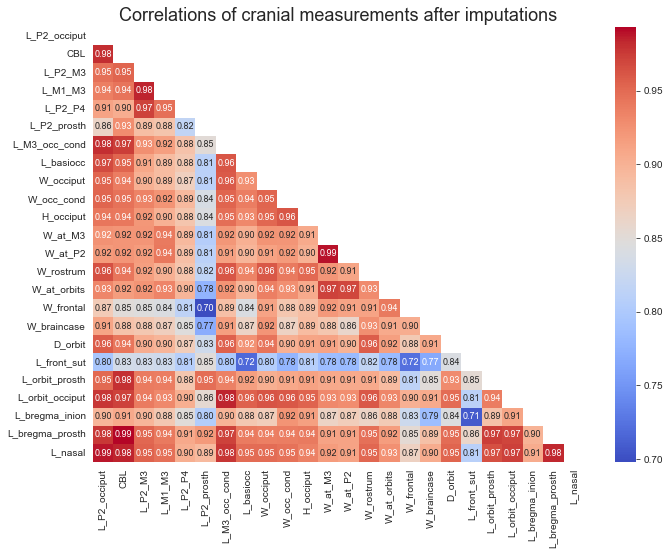

In [217]:
# improved version of the heatmap
corr = cranial_selected.corr()
sns.set_style(style='white')

matrix = np.triu(corr)

sns.heatmap(corr, annot=True, fmt=".2f", mask=matrix, cmap="coolwarm",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot_kws={"size": 9}).set_title('Correlations of cranial measurements after imputations', fontsize=18)

fig = plt.gcf()
fig.set_size_inches(11, 8)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.savefig("after_imputation.jpg", bbox_inches='tight', dpi=600)
plt.show()


In [218]:
cranial_selected = round(cranial_selected, 2)
cranial_selected.to_excel('reconstructed_cranial_measurements.xlsx', index=False)

 # Principal Component Analysis of all measurements

In [219]:
total_pca = cranial_selected.drop('deer_species', 1)

In [220]:
# standartization of data
scaler = StandardScaler()

scaled_total_pca = scaler.fit_transform(total_pca)

In [221]:
# Select the number of principal components we will return
num_components = 6

In [222]:
# Create the PCA model
pca_total = PCA(n_components=num_components)

In [223]:
# Fit the model with the standardised data
pca_total.fit(scaled_total_pca)

PCA(n_components=6)

In [224]:
explained_variances = pca_total.explained_variance_ratio_
print(explained_variances)

[0.90875719 0.02420428 0.01509039 0.01348097 0.00811123 0.00726009]


In [225]:
cum_sum_eigenvalues = pca_total.explained_variance_ratio_.cumsum()
print(cum_sum_eigenvalues)

[0.90875719 0.93296147 0.94805185 0.96153282 0.96964405 0.97690414]


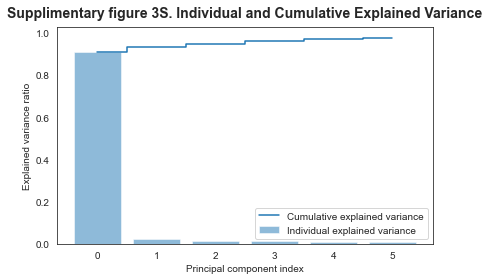

In [226]:
# Scree plot showing sufficient number of principal components explaining variance of data:
sns.set_style(style='white')
plt.bar(range(0,len(explained_variances)), explained_variances, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.title("Supplimentary figure 3S. Individual and Cumulative Explained Variance", fontsize = 14, pad = 10, fontweight="bold")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("Fig_3S_PCA_explained_variance.jpg", bbox_inches='tight', dpi=600)
plt.show()

**Comment**: the first two principal components account for 94% of the data variance, indicating that the first factorial plane provides sufficient representation.

In [227]:
n = total_pca.shape[0]

In [228]:
pca_total_df = pd.DataFrame(pca_total.transform(scaled_total_pca), index=cranial_selected.deer_species, columns=['PC1','PC2', 'PC3','PC4', 'PC5','PC6',])

In [229]:
pca_total_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
deer_species,,,,,,
"""Pseudodama""",2.582424,0.334802,0.311055,-0.162997,-0.167505,0.163656
A. axis,4.506498,0.142435,0.491456,-0.045610,-0.046025,0.334672
C. c. palmidactyloceros,-3.271957,0.122693,-0.268943,-0.303824,1.235247,0.437078
C. c. sibiricus,-3.256947,-0.467595,-0.089373,-0.014278,-0.083846,-0.606117
C. e. bactrianus,-0.936005,-0.254983,-0.055751,-0.480801,-0.334736,-0.677693


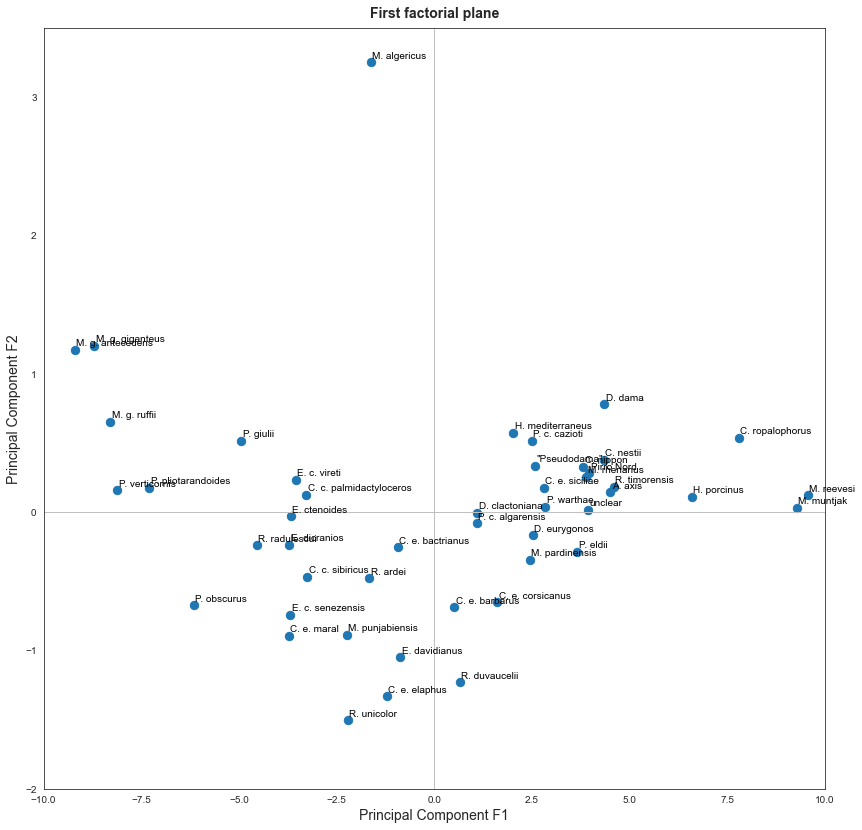

In [230]:
fig, axes = plt.subplots(figsize=(14, 14))
axes.set_xlim(-10, 10)
axes.set_ylim(-2, 3.5)

# Define the annotation offset
annotation_offset = (0.04, 0.03)

# Annotate points with index values
n = len(pca_total_df)
for i in range(n):
    point_coords = (pca_total_df.iloc[i, 0], pca_total_df.iloc[i, 1])
    annotation_coords = (point_coords[0] + annotation_offset[0], point_coords[1] + annotation_offset[1])
    plt.annotate(cranial_selected.deer_species.iloc[i], annotation_coords, color='black')

# Scatter plot
plt.scatter(pca_total_df['PC1'], pca_total_df['PC2'], c='tab:blue', marker='o', s=70)

plt.plot([-10, 10], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-6, 6], color='silver', linestyle='-', linewidth=1)
plt.title("First factorial plane", fontsize = 14, pad = 10, fontweight = 'bold')
plt.xlabel('Principal Component F1', fontsize=14)
plt.ylabel('Principal Component F2', fontsize=14)
plt.savefig("Cervinae_skulls_PCA.jpg", bbox_inches='tight', dpi = 600)
plt.show()


In [231]:
# Calculate the contribution of species in the total inertia
di = np.sum(pca_total_df**2, axis=1)
contributions_df = pd.DataFrame({'contribution': di})

# Sort the DataFrame by the 'contribution' column in descending order
contributions_df_sorted = contributions_df.sort_values(by='contribution', ascending=False)

print(contributions_df_sorted)


                         contribution
deer_species                         
M. reevesi                  91.489687
M. g. antecedens            87.020684
M. muntjak                  86.258566
M. g. giganteus             78.747596
M. g. ruffii                71.044005
P. verticornis              66.321226
C. ropalophorus             62.002861
P. pliotarandoides          54.279232
H. porcinus                 43.554372
P. obscurus                 40.110338
P. giulii                   26.385012
R. radulescui               21.722122
R. timorensis               21.226938
A. axis                     20.686542
D. dama                     19.897237
C. nestii                   19.138810
M. algericus                17.549609
Pirro Nord                  16.284833
C. e. maral                 15.697862
M. rhenanus                 15.606693
unclear                     15.512489
E. c. vireti                15.233239
C. nippon                   14.744426
E. dicranios                14.565601
E. c. seneze

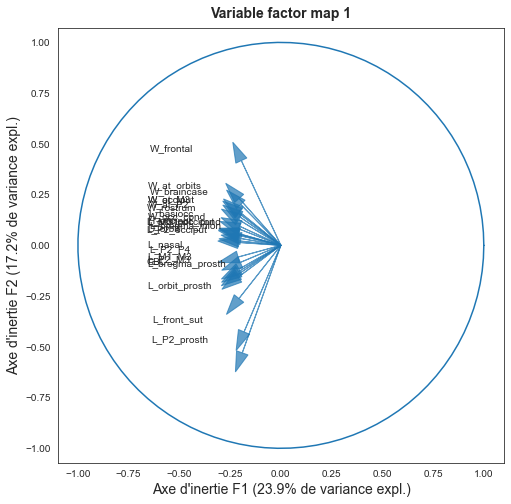

In [232]:
(fig, ax) = plt.subplots(figsize=(8, 8))
arrow_color = 'tab:blue'

for j in range(0, pca_total.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca_total.components_[0, j],  # 0 for PC1
             pca_total.components_[1, j],  # 1 for PC2
             head_width=0.06,
             head_length=0.1,
             color=arrow_color,
             linestyle='solid',
             alpha=0.7)
    
        # Adjust the text positions for left-side annotations
    text_x = pca_total.components_[0, j] - 0.45  # Adjust this value as needed
    text_y = pca_total.components_[1, j] + 0.05
    plt.text(text_x, text_y, total_pca.columns.values[j])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.xlabel("Axe d'inertie F1 (23.9% de variance expl.)", fontsize=14)
plt.ylabel("Axe d'inertie F2 (17.2% de variance expl.)", fontsize=14)
ax.set_title('Variable factor map 1', fontsize = 14, pad = 10, fontweight = 'bold')
plt.savefig("Cervinae_variable_factor_map.jpg", bbox_inches='tight', dpi = 600)
plt.show()

## Hierarchical clustering based on all measurements

In [233]:
total_clustering = cranial_selected

In [234]:
total_clustering["bregma_position"] = total_clustering["L_bregma_inion"]/total_clustering["L_bregma_prosth"]*100
total_clustering["breadth_to_length"] = total_clustering["W_at_M3"]/total_clustering["CBL"]*100
total_clustering["occiput_breadth"] = total_clustering["W_occiput"]/total_clustering["L_P2_occiput"]*100

In [235]:
total_hierarchical_clustering = total_clustering.drop('deer_species', 1)

In [236]:
# standartization of data
scaler = StandardScaler()

In [237]:
scaled_data_hierarchical_clustering = scaler.fit_transform(total_hierarchical_clustering)
scaled_data_hierarchical_clustering_ = pd.DataFrame(scaled_data_hierarchical_clustering)
scaled_data_hierarchical_clustering_['deer_species'] = total_clustering['deer_species']
scaled_data_hierarchical_clustering_.set_index('deer_species', inplace=True)

In [238]:
unclear = "unclear"
scaled_data_hierarchical_clustering_.drop(unclear, inplace=True)

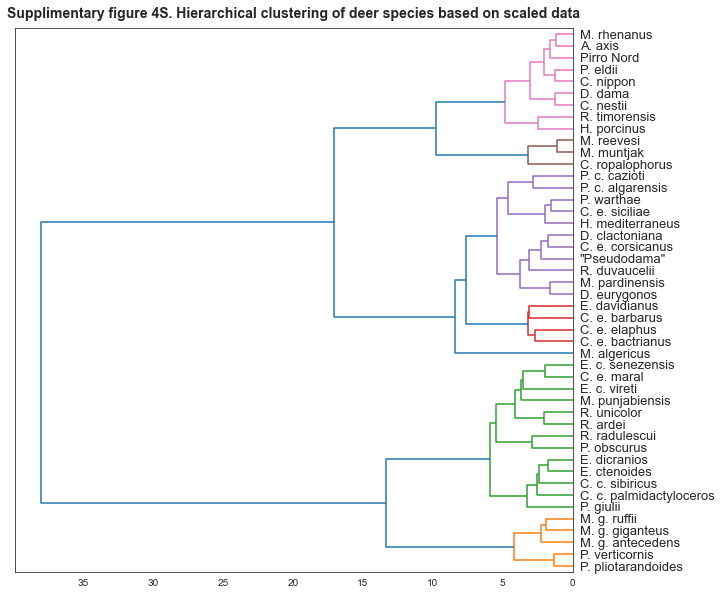

In [240]:
Z = linkage(scaled_data_hierarchical_clustering_, method = 'ward', metric = 'euclidean')

plt.figure(figsize=(10,10))
plt.title('Supplimentary figure 4S. Hierarchical clustering of deer species based on scaled data', fontsize = 14, pad = 10, fontweight = 'bold')
dendrogram(Z, labels = scaled_data_hierarchical_clustering_.index, orientation = 'left', color_threshold = 7, leaf_font_size=13)
plt.savefig("total_hierarchical_clustering.jpg", bboxinches = "tight", dpi=600)
plt.show()

**COMMENT**: The hierarchical clustering based on scaled values of all cranial measurements did not provide reliable results from phylogenetic, morphofunctional, or ecological points of view. Therefore, these results are not discussed in the article.

## Splanchnocranium measurements

In [241]:
cranial_selected.columns

Index(['deer_species', 'L_P2_occiput', 'CBL', 'L_P2_M3', 'L_M1_M3', 'L_P2_P4',
       'L_P2_prosth', 'L_M3_occ_cond', 'L_basiocc', 'W_occiput', 'W_occ_cond',
       'H_occiput', 'W_at_M3', 'W_at_P2', 'W_rostrum', 'W_at_orbits',
       'W_frontal', 'W_braincase', 'D_orbit', 'L_front_sut', 'L_orbit_prosth',
       'L_orbit_occiput', 'L_bregma_inion', 'L_bregma_prosth', 'L_nasal',
       'bregma_position', 'breadth_to_length', 'occiput_breadth'],
      dtype='object')

In [242]:
face_index = cranial_selected[['deer_species', 
                                    'CBL',
                                    'L_P2_M3', 
                                    'L_P2_prosth',
                                    'W_at_P2',
                                    'W_at_M3',
                                    'W_at_orbits',
                                    'L_front_sut',
                                    'L_orbit_prosth', 'L_bregma_prosth', 'L_nasal',
                                    'L_bregma_inion', 'bregma_position']]

In [243]:
# Length of face (orbit - prosthion) to condybasal length, %
face_index['LORPR_CBL'] = face_index['L_orbit_prosth'] / face_index['CBL'] * 100

In [244]:
# Length of upper tooth row to condylobasal length, %
face_index['P2M3_CBL'] = face_index['L_P2_M3'] / face_index['CBL'] * 100

In [245]:
# Breadth of skull at P2 to condylobasal length, %
face_index['WP2_CBL'] = face_index['W_at_P2'] / face_index['CBL'] * 100

In [246]:
face_index.head()

,deer_species,CBL,L_P2_M3,L_P2_prosth,W_at_P2,W_at_M3,W_at_orbits,L_front_sut,L_orbit_prosth,L_bregma_prosth,L_nasal,L_bregma_inion,bregma_position,LORPR_CBL,P2M3_CBL,WP2_CBL
0,"""Pseudodama""",298.74,87.50,91.78,59.24,84.91,111.61,81.40,168.46,257.08,103.59,78.60,30.574140,56.390172,29.289683,19.829952
1,A. axis,262.00,79.25,81.30,55.63,69.47,84.93,78.82,143.70,225.09,97.20,73.58,32.689147,54.847328,30.248092,21.232824
2,C. c. palmidactyloceros,430.00,110.87,131.07,81.91,119.69,173.76,120.54,255.90,370.37,143.54,107.00,28.890029,59.511628,25.783721,19.048837
3,C. c. sibiricus,404.00,123.00,132.60,73.65,107.02,151.12,121.47,242.40,349.33,142.20,98.90,28.311339,60.000000,30.445545,18.230198
4,C. e. bactrianus,354.56,116.00,112.67,67.78,98.01,135.03,109.26,205.67,306.22,125.10,93.21,30.438900,58.007107,32.716606,19.116652


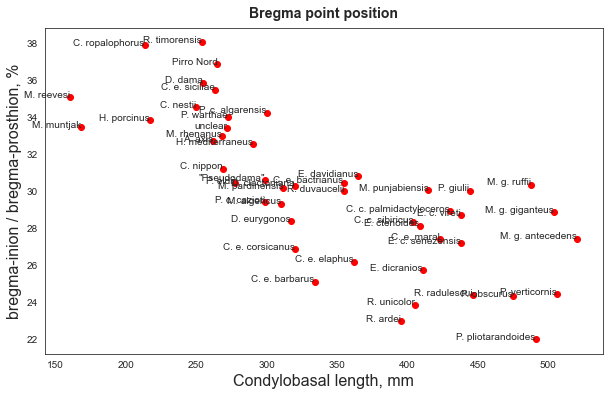

In [247]:
plt.figure(figsize=(10, 6))
plt.scatter(face_index['CBL'], face_index['bregma_position'], marker='o', color='red')

# Annotate points with deer species
for index, row in face_index.iterrows():
    plt.text(row['CBL'], row['bregma_position'], row['deer_species'], fontsize=10, ha='right')

plt.xlabel('Condylobasal length, mm', fontsize=16)
plt.ylabel('bregma-inion / bregma-prosthion, %', fontsize=16)


plt.title('Bregma point position', fontsize = 14, pad = 10, fontweight = 'bold')
#plt.savefig("Bregma_position.jpg", bbox_inches='tight', dpi = 600)
plt.show()

**COMMENT**: the position of the bregma point appears to be a very interesting morphological feature; therefore, this craniometric index is discussed in the article.

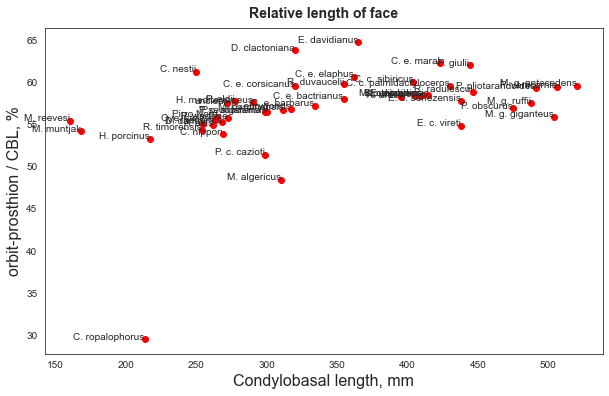

In [248]:
plt.figure(figsize=(10, 6))
plt.scatter(face_index['CBL'], face_index['LORPR_CBL'], marker='o', color='red')

# Annotate points with deer species
for index, row in face_index.iterrows():
    plt.text(row['CBL'], row['LORPR_CBL'], row['deer_species'], fontsize=10, ha='right')

plt.xlabel('Condylobasal length, mm', fontsize=16)
plt.ylabel('orbit-prosthion / CBL, %', fontsize=16)
plt.title('Relative length of face', fontsize = 14, pad = 10, fontweight = 'bold')
#plt.savefig("relative_length_face.jpg", bbox_inches='tight', dpi = 600)
plt.show()

**COMMENT**: the relative length of the facial part of the skull is often discussed in the scientific literature dedicated to deer morphology and systematics. However, this character provides little insight into the general diversity of cervid cranial features. Nonetheless, this character is considered in the article.

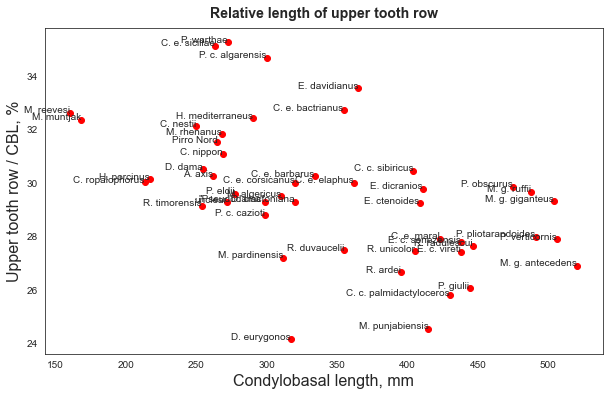

In [249]:
plt.figure(figsize=(10, 6))
plt.scatter(face_index['CBL'], face_index['P2M3_CBL'], marker='o', color='red')

for index, row in face_index.iterrows():
    plt.text(row['CBL'], row['P2M3_CBL'], row['deer_species'], fontsize=10, ha='right')

plt.xlabel('Condylobasal length, mm', fontsize = 16)
plt.ylabel('Upper tooth row / CBL, %', fontsize = 16)
plt.title('Relative length of upper tooth row', fontsize = 14, pad = 10, fontweight = 'bold')
#plt.savefig("relative_length_teeth.jpg", bboxinches = "tight", dpi=600)
plt.show()

**COMMENT**: the relative length of the upper tooth row exhibits a certain degree of variability in Cervinae, which holds adaptive significance. However, the quality of prediction based on the data used in this study seems to be low, especially in cases that yield extreme results; therefore, these results are approached cautiously.

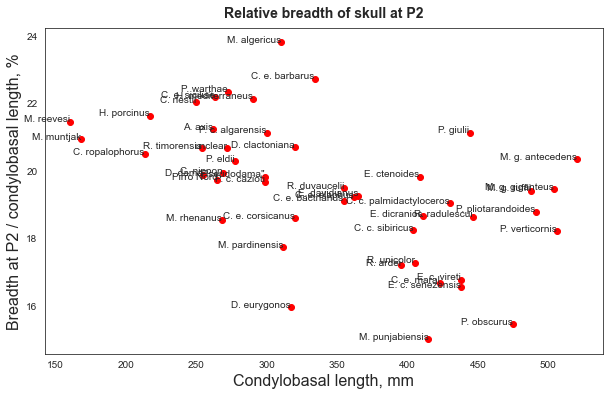

In [250]:
plt.figure(figsize=(10, 6))
plt.scatter(face_index['CBL'], face_index['WP2_CBL'], marker='o', color='red')

for index, row in face_index.iterrows():
    plt.text(row['CBL'], row['WP2_CBL'], row['deer_species'], fontsize=10, ha='right')

plt.xlabel('Condylobasal length, mm', fontsize = 16)
plt.ylabel('Breadth at P2 / condylobasal length, %', fontsize = 16)
plt.title('Relative breadth of skull at P2', fontsize = 14, pad = 10, fontweight = 'bold')
#plt.savefig("relative_breadth_skull.jpg", bboxinches = "tight", dpi=600)
plt.show()

**COMMENT**: the relative breadth of the skull at P2 plotted against the condylobasal length provides little informative value and, therefore, is not discussed in the article.

## Hierachical clustering of splanchnocranium data

In [251]:
face_index.set_index('deer_species', inplace=True)

In [252]:
scaler = StandardScaler()
scaled_face_data = scaler.fit_transform(face_index)

In [253]:
scaled_df = pd.DataFrame(scaled_face_data, index=face_index.index, columns=face_index.columns)

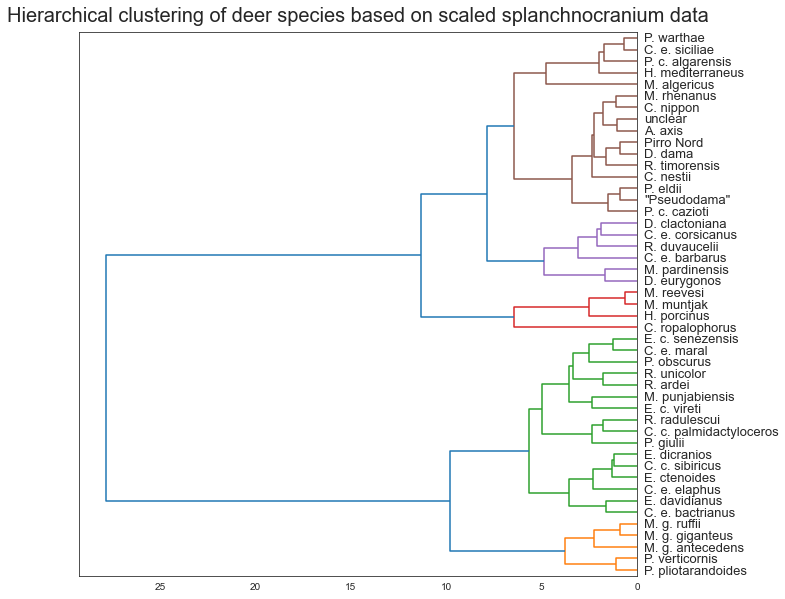

In [254]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage

Z = linkage(scaled_df, method = 'ward', metric = 'euclidean')

plt.figure(figsize=(10,10))
plt.title('Hierarchical clustering of deer species based on scaled splanchnocranium data', fontsize = 20, pad = 10)
dendrogram(Z, labels = scaled_df.index, orientation = 'left', color_threshold = 7, leaf_font_size=13)

plt.show()

**COMMENT**: the hierarchical clustering, which includes only scaled values of measurements of the splanchnocranium, did not provide reliable results or valuable insights; therefore, this result was not considered in the article.

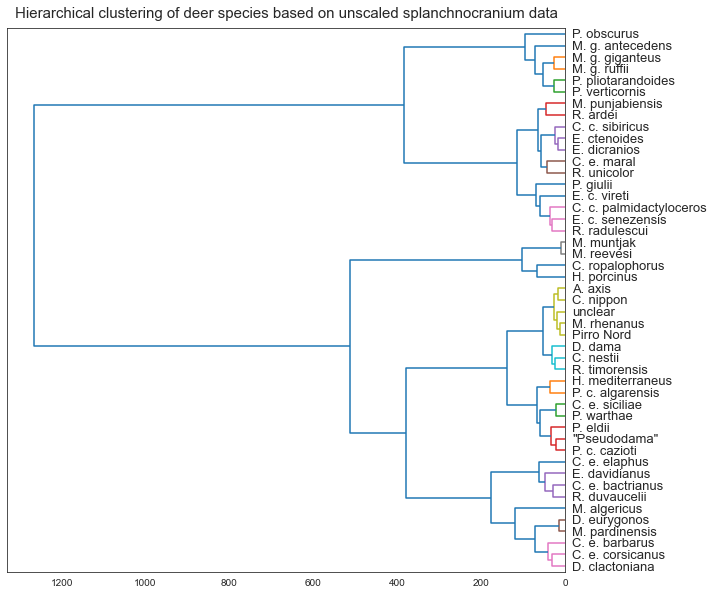

In [255]:
Z = linkage(face_index, method='ward', metric='euclidean')

plt.figure(figsize=(10, 10))
plt.title('Hierarchical clustering of deer species based on unscaled splanchnocranium data', fontsize=15, pad=10)
dendrogram(Z, labels=face_index.index, orientation='left', color_threshold=50, leaf_font_size=13)

plt.gca().invert_yaxis()
plt.savefig("Cervidae_splanchnocranium_clusters.jpg", bbox_inches='tight', dpi=600)
plt.show()

**COMMENT**: The hierarchical clustering analysis, incorporating unscaled measurements of the splanchnocranium, sheds light on the data's behavior but fails to yield reliable results or meaningful insights. Consequently, this aspect of the analysis was not included in the article.

# Neurocranium analysis

In [256]:
cranial_selected.columns

Index(['deer_species', 'L_P2_occiput', 'CBL', 'L_P2_M3', 'L_M1_M3', 'L_P2_P4',
       'L_P2_prosth', 'L_M3_occ_cond', 'L_basiocc', 'W_occiput', 'W_occ_cond',
       'H_occiput', 'W_at_M3', 'W_at_P2', 'W_rostrum', 'W_at_orbits',
       'W_frontal', 'W_braincase', 'D_orbit', 'L_front_sut', 'L_orbit_prosth',
       'L_orbit_occiput', 'L_bregma_inion', 'L_bregma_prosth', 'L_nasal',
       'bregma_position', 'breadth_to_length', 'occiput_breadth'],
      dtype='object')

In [257]:
cranial_indexes = cranial_selected[['deer_species', 
                                    'L_P2_occiput', 'CBL',
                                    'L_M3_occ_cond', 
                                    'W_occiput',
                                    'H_occiput',
                                    'W_at_M3',
                                    'W_at_orbits',
                                    'W_frontal',
                                    'W_braincase',
                                    'L_bregma_inion']]

In [258]:
cranial_indexes.head()

,deer_species,L_P2_occiput,CBL,L_M3_occ_cond,W_occiput,H_occiput,W_at_M3,W_at_orbits,W_frontal,W_braincase,L_bregma_inion
0,"""Pseudodama""",202.00,298.74,117.30,105.47,70.00,84.91,111.61,105.20,80.21,78.60
1,A. axis,180.70,262.00,101.52,83.53,56.33,69.47,84.93,94.30,71.78,73.58
2,C. c. palmidactyloceros,264.07,430.00,158.52,130.70,91.00,119.69,173.76,171.00,96.54,107.00
3,C. c. sibiricus,271.40,404.00,156.20,149.00,96.30,107.02,151.12,133.40,102.20,98.90
4,C. e. bactrianus,241.89,354.56,135.11,124.49,83.70,98.01,135.03,122.04,90.70,93.21


In [259]:
# Width of occiput to condylopremolar length, %
cranial_indexes['rel_W_occiput'] = cranial_indexes['W_occiput'] / cranial_indexes['L_P2_occiput'] * 100

In [260]:
# Width at M3 to condylopremolar length, %
cranial_indexes['rel_W_at_M3'] = cranial_indexes['W_at_M3'] / cranial_indexes['L_P2_occiput'] * 100

In [261]:
# Wifth of forehead to condylopremolar length, %
cranial_indexes['rel_W_frontal'] = cranial_indexes['W_frontal'] / cranial_indexes['L_P2_occiput'] * 100

In [262]:
# Width of braincase to condylopremolar length, %
cranial_indexes['rel_W_braincase'] = cranial_indexes['W_braincase'] / cranial_indexes['L_P2_occiput'] * 100

In [263]:
# Width of braincase to frontal breadth, %
cranial_indexes['W_brainc_to_front'] = cranial_indexes['W_braincase'] / cranial_indexes['W_frontal'] * 100

In [264]:
# Relative length of braincase: xidth to bregma - inion distanceee, %
cranial_indexes['rel_L_braincase'] = cranial_indexes['W_braincase'] / cranial_indexes['L_bregma_inion'] * 100

In [265]:
# Width of occiput to width of forehead, %
cranial_indexes['occiput_to_frontal'] = cranial_indexes['W_occiput'] / cranial_indexes['W_frontal'] * 100

In [266]:
cranial_indexes['BrInion_to_M3cond'] = cranial_indexes['L_bregma_inion'] / cranial_indexes['L_M3_occ_cond'] * 100

In [267]:
neurocran_index = cranial_indexes[['rel_W_occiput','rel_W_at_M3','rel_W_frontal','rel_W_braincase','W_brainc_to_front','rel_L_braincase','occiput_to_frontal', 'BrInion_to_M3cond']]

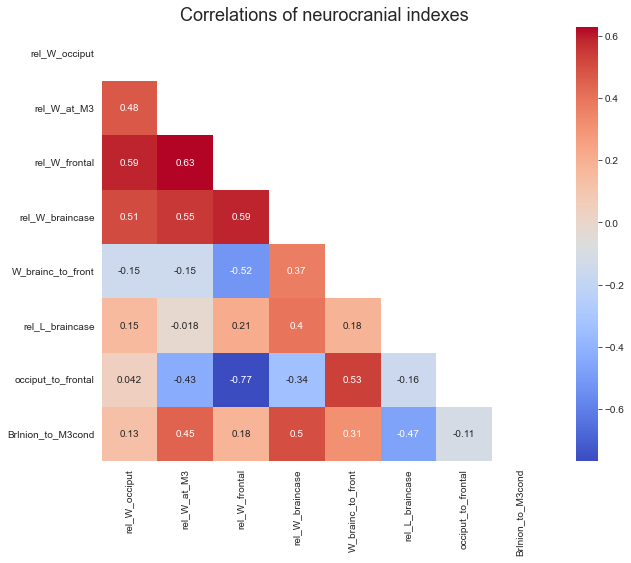

In [268]:
corr = neurocran_index.corr()
sns.set_style(style='white')
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap="coolwarm",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Correlations of neurocranial indexes',fontsize=18)
fig = plt.gcf()
fig.set_size_inches(10, 8)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#plt.savefig("after_imputation.jpg", bbox_inches='tight')
plt.show()

**COMMENT**: The correlations observed among neurocranial indices are predictable and do not offer any novel insights. Consequently, this finding has been omitted from the article.

In [269]:
scaled_indexes = scaler.fit_transform(neurocran_index)

In [270]:
scaled_indexes_df = pd.DataFrame(scaled_indexes)

## Hierarchical clustering of neurocranium indexes

In [271]:
selected_data = cranial_indexes[['deer_species', 'CBL', 'rel_W_occiput',
                                   'rel_W_frontal',
                                   'rel_W_braincase',
                                   'W_brainc_to_front',
                                   'rel_L_braincase']]

In [272]:
selected_data.head()

,deer_species,CBL,rel_W_occiput,rel_W_frontal,rel_W_braincase,W_brainc_to_front,rel_L_braincase
0,"""Pseudodama""",298.74,52.212871,52.079208,39.707921,76.245247,102.048346
1,A. axis,262.00,46.225789,52.185944,39.723298,76.118770,97.553683
2,C. c. palmidactyloceros,430.00,49.494452,64.755557,36.558488,56.456140,90.224299
3,C. c. sibiricus,404.00,54.900516,49.152542,37.656595,76.611694,103.336704
4,C. e. bactrianus,354.56,51.465542,50.452685,37.496383,74.319895,97.307156


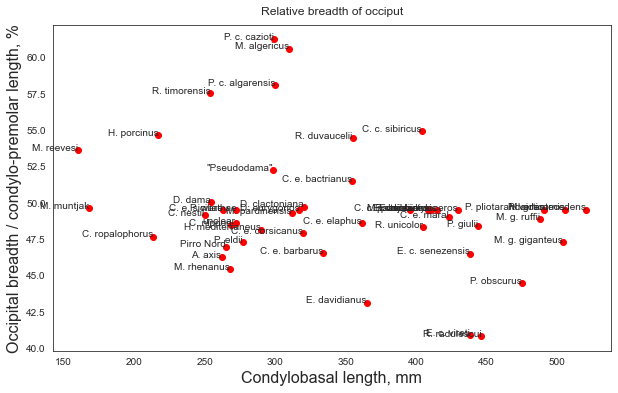

In [273]:
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['CBL'], selected_data['rel_W_occiput'], marker='o', color='red')

for index, row in selected_data.iterrows():
    plt.text(row['CBL'], row['rel_W_occiput'], row['deer_species'], fontsize=10, ha='right')

plt.xlabel('Condylobasal length, mm', fontsize = 16)
plt.ylabel('Occipital breadth / condylo-premolar length, %', fontsize = 16)
plt.title('Relative breadth of occiput', pad = 10)
plt.savefig("relative_breadth_occiput.jpg", bboxinches = "tight", dpi=600)
plt.show()

**COMMENT**: the plot depicting the relative breadth of the occiput against the condylobasal length is interesting and has been included in the article as Figure 11. However, *Cervus nestii* has been excluded from the final version of the figure due to a bias likely stemming from variations in the sizes of individuals represented by fragmented skulls.

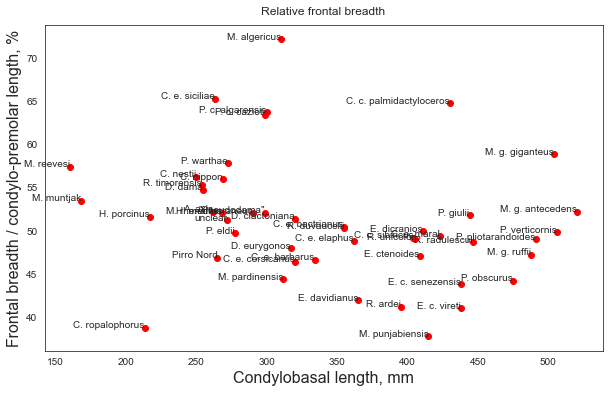

In [274]:
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['CBL'], selected_data['rel_W_frontal'], marker='o', color='red')

for index, row in selected_data.iterrows():
    plt.text(row['CBL'], row['rel_W_frontal'], row['deer_species'], fontsize=10, ha='right')

plt.xlabel('Condylobasal length, mm', fontsize = 16)
plt.ylabel('Frontal breadth / condylo-premolar length, %', fontsize = 16)
plt.title('Relative frontal breadth', pad = 10)
#plt.savefig("relative_frontal_breadth.jpg", bboxinches = "tight", dpi=600)
plt.show()

**COMMENT**: the plot depicting the relative breadth of the frontal bones plotted against the condylobasal length is interesting and has been included in the article as Figure 7 and supplimented with a discussion and interpretations of the obtained results.

In [275]:
craniometric_data = cranial_data

In [276]:
craniometry_males = craniometric_data.drop(craniometric_data[craniometric_data.sex != "M"].index)

In [277]:
column_names = craniometric_data.columns

In [278]:
column_names

Index(['genus', 'species', 'subspecies', 'nn', 'Locality', 'sex', 'Collection',
       'note', 'deer_species', 'L_P2_occiput', 'CBL', 'L_P2_M3', 'L_M1_M3',
       'L_P2_P4', 'L_P2_prosth', 'L_M3_occ_cond', 'L_basiocc', 'W_occiput',
       'W_mastoidal', 'W_occ_cond', 'H_occip_for_magn', 'H_occiput', 'W_at_M3',
       'W_at_P2', 'W_rostrum', 'W_zygomatic', 'W_at_orbits', 'W_frontal',
       'W_braincase', 'W_basioccip', 'D_orbit', 'L_front_sut',
       'L_orbit_prosth', 'L_orbit_occiput', 'L_bregma_inion',
       'L_bregma_prosth', 'L_nasal', 'P2M3_CBL', 'ORBPR_CBL', 'WBRAINC_LBRIN',
       'LMM_LP2PR', 'LBRIN_P2COND', 'WOCC_P2COND', 'WM3_P2COND', 'WFR_P2COND',
       'PP_MM', 'LBRIN_P2COND2', 'WBRAINC_WFR', 'LBRIN_M3COND', 'HOCC_WOCC',
       'WCOND_WFR'],
      dtype='object')

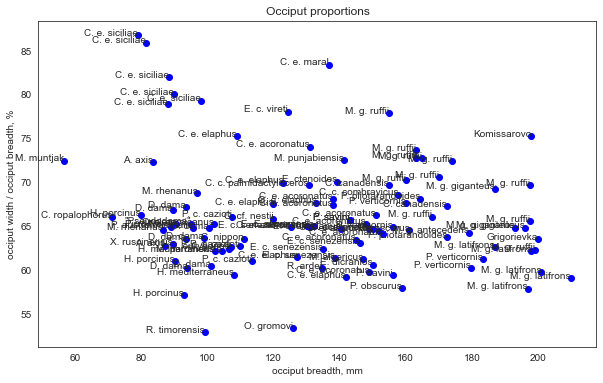

In [279]:
import matplotlib.pyplot as plt

# Filter out rows with non-finite values
filtered_df = craniometry_males[np.isfinite(craniometry_males['W_occiput']) & np.isfinite(craniometry_males['HOCC_WOCC'])]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['W_occiput'], filtered_df['HOCC_WOCC'], marker='o', color='b')

# Annotate points with deer species
for index, row in filtered_df.iterrows():
    plt.text(row['W_occiput'], row['HOCC_WOCC'], row['deer_species'], fontsize=10, ha='right')

plt.xlabel('occiput breadth, mm')
plt.ylabel('occiput width / occiput breadth, %')
plt.title('Occiput proportions')
plt.show()

**COMMENT**: this plot shows potential interest, but further data are required to provide an adequate interpretation of the result. Consequently, this diagram is not included in the article.

# Feeding and masticatory part analysis

In [280]:
masticatory = cranial_selected[['deer_species',
                            'L_P2_occiput',
                            'CBL', 'L_P2_M3', 'L_P2_P4',
                            'L_M1_M3', 'W_occiput', 'H_occiput',
                            'L_P2_prosth',
                            'W_at_M3', 'W_at_P2',
                            'W_rostrum',
                            'L_orbit_prosth']]

In [281]:
cranial_selected.columns

Index(['deer_species', 'L_P2_occiput', 'CBL', 'L_P2_M3', 'L_M1_M3', 'L_P2_P4',
       'L_P2_prosth', 'L_M3_occ_cond', 'L_basiocc', 'W_occiput', 'W_occ_cond',
       'H_occiput', 'W_at_M3', 'W_at_P2', 'W_rostrum', 'W_at_orbits',
       'W_frontal', 'W_braincase', 'D_orbit', 'L_front_sut', 'L_orbit_prosth',
       'L_orbit_occiput', 'L_bregma_inion', 'L_bregma_prosth', 'L_nasal',
       'bregma_position', 'breadth_to_length', 'occiput_breadth'],
      dtype='object')

In [282]:
masticatory.sample(3)

,deer_species,L_P2_occiput,CBL,L_P2_M3,L_P2_P4,L_M1_M3,W_occiput,H_occiput,L_P2_prosth,W_at_M3,W_at_P2,W_rostrum,L_orbit_prosth
24,M. g. antecedens,361.6,520.35,139.9,62.2,86.05,179.00,114.50,136.0,156.48,105.90,93.59,309.65
45,R. unicolor,261.5,405.00,111.1,48.1,63.00,126.36,85.05,143.5,101.36,69.97,65.61,236.16
23,M. algericus,255.0,310.00,91.4,42.6,54.10,154.50,90.00,55.0,110.50,73.80,81.80,150.00


In [283]:
# Upper tooth row to condylobasal length, %
masticatory['P2M3_CBL'] = masticatory['L_P2_M3']/masticatory['CBL']*100
# Width at M3 to upper tooth row length, %
masticatory['WM3_LP2M3'] = masticatory['W_at_M3']/masticatory['L_P2_M3']*100
# Width at P2 to face length, %
masticatory['WP2_LORPR'] = masticatory['W_at_P2']/masticatory['L_orbit_prosth']*100
# Premolar to molar series length, %
masticatory['PP_MM'] = masticatory['L_P2_P4']/masticatory['L_M1_M3']*100
# Width of rostrum to width at M3, %
masticatory['WRO_WM3'] = masticatory['W_rostrum']/masticatory['W_at_M3']*100
# Face length to condylobasal length, %
masticatory['LORPR_CBL'] = masticatory['L_orbit_prosth']/masticatory['CBL']*100
# Shape of rostrum, %
masticatory['W_LROSTR'] = masticatory['W_rostrum']/masticatory['L_P2_prosth']*100
# Position of bregma: bregma inion to bregma prosthion, %
masticatory['WP2_LP2OCC'] = masticatory['W_at_P2']/masticatory['L_P2_occiput']*100
# Upper tooth row to condylobasal length, %
masticatory['P2M3_LROSTR'] = masticatory['L_P2_M3']/masticatory['L_P2_prosth']*100
# Occiput height to occiput breadth, %
masticatory['Hoccip_Doccip'] = masticatory['H_occiput']/masticatory['W_occiput']*100
# Occiput height to face length, %
masticatory['Hoccip_Lface'] = masticatory['H_occiput']/masticatory['L_P2_prosth']*100

In [284]:
# Width of rostrum to CBL, %
masticatory['Wrosrt_CBL'] = masticatory['W_rostrum']/masticatory['CBL']*100

In [285]:
masticatory_index = masticatory[['P2M3_CBL','WM3_LP2M3','WP2_LORPR','PP_MM','WRO_WM3','LORPR_CBL','W_LROSTR', 'WP2_LP2OCC', 'P2M3_LROSTR', 'Hoccip_Doccip', 'Hoccip_Lface']]

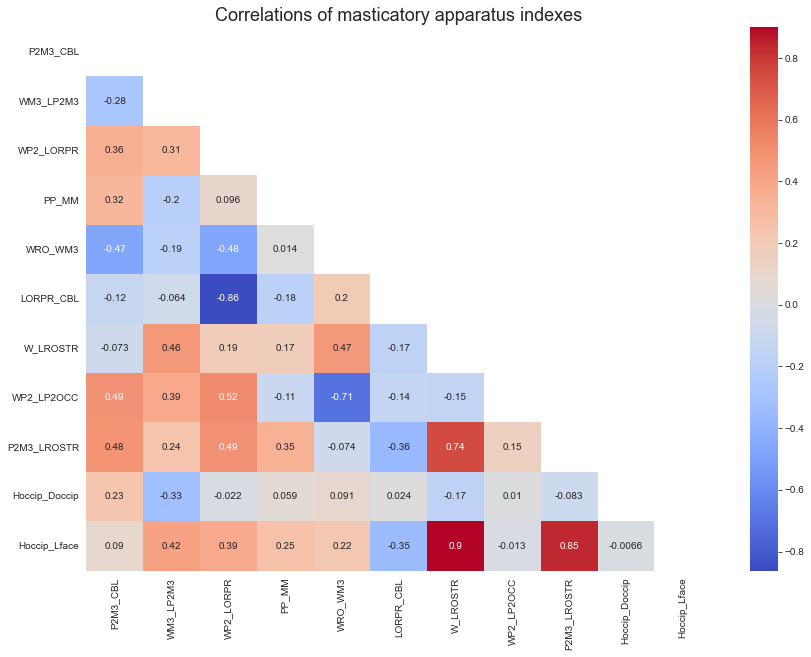

In [286]:
corr = masticatory_index.corr()
sns.set_style(style='white')
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap="coolwarm",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Correlations of masticatory apparatus indexes',fontsize=18)
fig = plt.gcf()
fig.set_size_inches(14, 10)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#plt.savefig("masticatory_indexes_correlation.jpg", bbox_inches='tight', dpi=600)
plt.show()

**COMMENT**: this correlation matrix, focusing on ratios of measurements of the masticatory apparatus and those related to feeding ecology, shows potential interest. However, it requires further methodological refinement and additional data for an adequate interpretation. Moreover, this line of inquiry extends beyond the scope of the article. As a result, this correlation matrix is not included in the article.

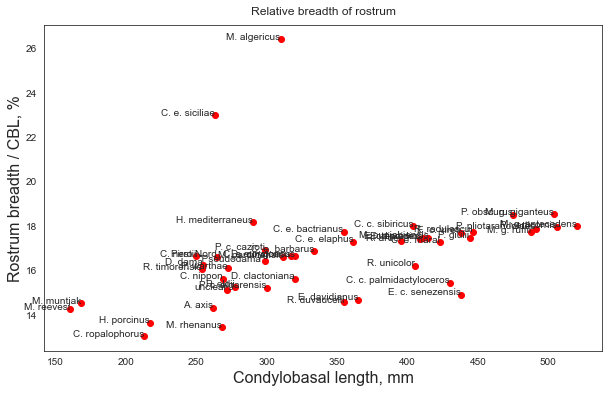

In [287]:
plt.figure(figsize=(10, 6))
plt.scatter(masticatory['CBL'], masticatory['Wrosrt_CBL'], marker='o', color='red')

for index, row in masticatory.iterrows():
    plt.text(row['CBL'], row['Wrosrt_CBL'], row['deer_species'], fontsize=10, ha='right')

plt.xlabel('Condylobasal length, mm', fontsize = 16)
plt.ylabel('Rostrum breadth / CBL, %', fontsize = 16)
plt.title('Relative breadth of rostrum', pad = 10)
#plt.savefig("relative_breadth_rostrum.jpg", bbox_inches='tight', dpi=600)
plt.show()

**COMMENT**: This diagram, illustrating the relative breadth of the rostrum plotted against condylobasal length, offers valuable insights and is featured as Figure 7 in the article.

In [288]:
a = cranial_selected["deer_species"].unique()
print(a)

['"Pseudodama"' 'A. axis' 'C. c. palmidactyloceros' 'C. c. sibiricus'
 'C. e. bactrianus' 'C. e. barbarus' 'C. e. corsicanus' 'C. e. elaphus'
 'C. e. maral' 'C. e. siciliae' 'C. nestii' 'C. nippon' 'C. ropalophorus'
 'D. clactoniana' 'D. dama' 'D. eurygonos' 'E. c. senezensis'
 'E. c. vireti' 'E. ctenoides' 'E. davidianus' 'E. dicranios'
 'H. mediterraneus' 'H. porcinus' 'M. algericus' 'M. g. antecedens'
 'M. g. giganteus' 'M. g. ruffii' 'M. muntjak' 'M. pardinensis'
 'M. punjabiensis' 'M. reevesi' 'M. rhenanus' 'P. c. algarensis'
 'P. c. cazioti' 'P. eldii' 'P. giulii' 'P. obscurus' 'P. pliotarandoides'
 'P. verticornis' 'P. warthae' 'Pirro Nord' 'R. ardei' 'R. duvaucelii'
 'R. radulescui' 'R. timorensis' 'R. unicolor' 'unclear']
